# Spotify-Data 1921-2020 - Exploração de Dados

### Descrição


### Os Dados

Este dataset contêm mais de 160.000 músicas obtidas a partir da Spotify Web API.

Audio Features:

- **Popularity** - popularidade da música (0 a 100);
- **Year** - ano de lançamento (2000 até 2023);
- **Danceability** - se a música é adequada para dançar (0.0 a 1.0);
- **Energy** - uma medição perceptual da intensidade e atividade da música (0.0 a 1.0);
- **Key** - a tonalidade da música (-1 a 11): -1 no key detected;
- **Loudness** - intensidade da música em decibeis (-60 até 0 dB);
- **Mode** - modalidade da música (0 - Menor ou 1 - Maior);
- **Speechiness** - a presença de fala na música;
- **Acousticness** - medida de confiança (0 a 1) em saber se a música é acústica;
- **Instrumentalness** - se a música contém vocais (0 a 1);
- **Liveness** - presença de público na gravação da música (0 a 1);
- **Valence** - positividade musical (0 a 1);
- **Tempo** - o tempo da música em batimentos por minuto(BPM);
- **Time_signature** - assinatura do tempo de uma música (3 a 7);
- **Duration_ms** - duração em milissegundos.

## Importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from scipy import stats
%matplotlib inline

## Compreender os dados

Carregar o dataset

In [3]:
data = pd.read_csv('data.csv')

Visualizar features do problema

In [4]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Informações sobre valores nulos e tipos de dados de cada coluna

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Apresentação de valores médios, quartis, mediana, mínimo, máximo, etc de cada coluna

In [6]:
data.describe()

acousticness   danceability   duration_ms         energy  \
count  169909.000000  169909.000000  1.699090e+05  169909.000000   
mean        0.493214       0.538150  2.314062e+05       0.488593   
std         0.376627       0.175346  1.213219e+05       0.267390   
min         0.000000       0.000000  5.108000e+03       0.000000   
25%         0.094500       0.417000  1.710400e+05       0.263000   
50%         0.492000       0.548000  2.086000e+05       0.481000   
75%         0.888000       0.667000  2.629600e+05       0.710000   
max         0.996000       0.988000  5.403500e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  169909.000000     169909.000000  169909.000000  169909.000000   
mean        0.084863          0.161937       5.200519       0.206690   
std         0.278679          0.309329       3.515257       0.176796   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.098400   
50%         0.000000          0.000204       5.000000       0.135000   
75%         0.000000          0.086800       8.000000       0.263000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  169909.000000  169909.000000  169909.000000  169909.000000   
mean      -11.370289       0.708556      31.556610       0.094058   
std         5.666765       0.454429      21.582614       0.149937   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.470000       0.000000      12.000000       0.034900   
50%       -10.474000       1.000000      33.000000       0.045000   
75%        -7.118000       1.000000      48.000000       0.075400   
max         3.855000       1.000000     100.000000       0.969000   

               tempo        valence           year  
count  169909.000000  169909.000000  169909.000000  
mean      116.948017       0.532095    1977.223231  
std        30.726937       0.262408      25.593168  
min         0.000000       0.000000    1921.000000  
25%        93.516000       0.322000    1957.000000  
50%       114.778000       0.544000    1978.000000  
75%       135.712000       0.749000    1999.000000  
max       244.091000       1.000000    2020.000000

Apresentação dos primeiros registos do dataset

In [7]:
data.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

Apresentação dos últimos registos do dataset

In [8]:
data.tail()

acousticness                             artists  danceability  \
169904        0.1730              ['DripReport', 'Tyga']         0.875   
169905        0.0167  ['Leon Bridges', 'Terrace Martin']         0.719   
169906        0.5380               ['Kygo', 'Oh Wonder']         0.514   
169907        0.0714       ['Cash Cash', 'Andy Grammer']         0.646   
169908        0.1090                  ['Ingrid Andress']         0.512   

        duration_ms  energy  explicit                      id  \
169904       163800   0.443         1  4KppkflX7I3vJQk7urOJaS   
169905       167468   0.385         0  1ehhGlTvjtHo2e4xJFB0SZ   
169906       180700   0.539         0  52eycxprLhK3lPcRLbQiVk   
169907       167308   0.761         0  3wYOGJYD31sLRmBgCvWxa4   
169908       214787   0.428         0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  key  liveness  loudness  mode  \
169904          0.000032    1    0.0891    -7.461     1   
169905          0.031300    8    0.1110   -10.907     1   
169906          0.002330    7    0.1080    -9.332     1   
169907          0.000000    1    0.2220    -2.557     1   
169908          0.000000    0    0.1050    -7.387     1   

                                  name  popularity release_date  speechiness  \
169904   Skechers (feat. Tyga) - Remix          75   2020-05-15       0.1430   
169905  Sweeter (feat. Terrace Martin)          64   2020-06-08       0.0403   
169906                How Would I Know          70   2020-05-29       0.1050   
169907                     I Found You          70   2020-02-28       0.0385   
169908           More Hearts Than Mine          65   2020-03-27       0.0271   

          tempo  valence  year  
169904  100.012    0.306  2020  
169905  128.000    0.270  2020  
169906  123.700    0.153  2020  
169907  129.916    0.472  2020  
169908   80.588    0.366  2020

Analisar os valores possíveis para a feature 'track_id'

In [9]:
data['id'].value_counts()

id
6KbQ3uYMLKb5jDxLF7wYDD    1
1wbM7WXEKWPxqwFg3iR6BU    1
7e3KM7NU4FMdfSKolIJtMI    1
1pPrO5Lcx9UXNebcloGeHE    1
0XFfzuPe33FeLDRybwwYhd    1
                         ..
102yVwuDzXJ8R7bbA5zIG7    1
106dYCMIYBfdFhJMbWTEr2    1
10KlzvuaAH7p2LDWYbl4ph    1
10MqlNJk9H3a6vDN0BzBj7    1
60RFlt48hm0l4Fu0JoccOl    1
Name: count, Length: 169909, dtype: int64

Os valores são todos distintos, logo devemos remover esta coluna do dataset

In [10]:
data.drop('id', axis=1, inplace=True)

Converter duração para minutos, para ser mais fácil visualizar

In [11]:
data['duration_minutes'] = data['duration_ms'] / (1000 * 60)

In [12]:
data.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       158648  0.1950         0             0.563   10    0.1510   -12.428   
1       282133  0.0135         0             0.901    8    0.0763   -28.454   
2       104300  0.2200         0             0.000    5    0.1190   -19.924   
3       180760  0.1300         0             0.887    1    0.1110   -14.734   
4       687733  0.2040         0             0.908   11    0.0980   -16.829   

   mode                                           name  popularity  \
0     1                    Singende Bataillone 1. Teil           0   
1     1       Fantasiestücke, Op. 111: Più tosto lento           0   
2     0                 Chapter 1.18 - Zamek kaniowski           0   
3     0  Bebamos Juntos - Instrumental (Remasterizado)           0   
4     1    Polonaise-Fantaisie in A-Flat Major, Op. 61           1   

  release_date  speechiness    tempo  valence  year  duration_minutes  
0         1928       0.0506  118.469   0.7790  1928          2.644133  
1         1928       0.0462   83.972   0.0767  1928          4.702217  
2         1928       0.9290  107.177   0.8800  1928          1.738333  
3   1928-09-25       0.0926  108.003   0.7200  1928          3.012667  
4         1928       0.0424   62.149   0.0693  1928         11.462217

Verificar se tem duplicados

In [13]:
data.duplicated().sum()

588

Encontramos 588 registos duplicados

In [14]:
data.drop_duplicates(inplace=True)

Análise estatística do target do problema (a popularidade)

In [15]:
data['popularity'].describe().apply("{0:.2f}".format)

count    169321.00
mean         31.66
std          21.54
min           0.00
25%          12.00
50%          34.00
75%          48.00
max         100.00
Name: popularity, dtype: object

Podemos concluir que os valores para esta feature não estão bem distribuídos. Apesar de variar entre 0 e 100, metade dos valores tem popularidade inferior a 34, o que mostra que a maioria das popularidades medidas está próxima de 0.

Vamos então entender melhor a distribuição das popularidades, recorrendo a um histograma

<Axes: >

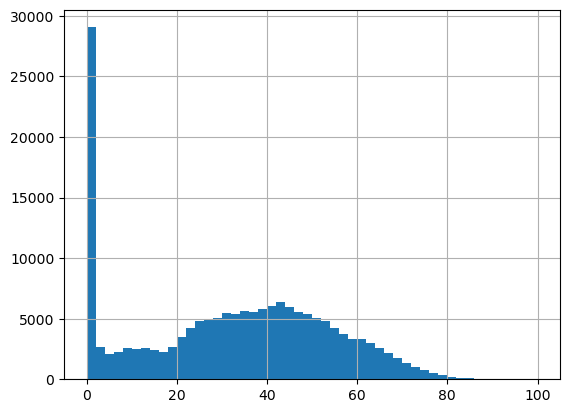

In [16]:
data['popularity'].hist(bins=50)

Encontramos muitos valores próximos de 0. Esses valores terão de ser tratados de modo a melhorar a distribuição dos valores no dataset.

In [17]:
data[data['popularity'] == 0]

acousticness                                     artists  \
0              0.995                         ['Carl Woitschach']   
1              0.994    ['Robert Schumann', 'Vladimir Horowitz']   
2              0.604                     ['Seweryn Goszczyński']   
3              0.995                        ['Francisco Canaro']   
5              0.995  ['Felix Mendelssohn', 'Vladimir Horowitz']   
...              ...                                         ...   
169822         0.217                                ['Don Omar']   
169825         0.913                                 ['ROSALÍA']   
169826         0.921                                 ['ROSALÍA']   
169849         0.262                          ['Ellie Goulding']   
169850         0.932                          ['Ellie Goulding']   

        danceability  duration_ms  energy  explicit  instrumentalness  key  \
0              0.708       158648  0.1950         0          0.563000   10   
1              0.379       282133  0.0135         0          0.901000    8   
2              0.749       104300  0.2200         0          0.000000    5   
3              0.781       180760  0.1300         0          0.887000    1   
5              0.424       352600  0.1200         0          0.911000    6   
...              ...          ...     ...       ...               ...  ...   
169822         0.741       255680  0.7870         0          0.017900    5   
169825         0.698       253109  0.2900         0          0.000021    4   
169826         0.442       214012  0.2670         0          0.000017    6   
169849         0.453       148689  0.3160         0          0.000894    0   
169850         0.491       188733  0.3670         0          0.000876   10   

        liveness  loudness  mode  \
0         0.1510   -12.428     1   
1         0.0763   -28.454     1   
2         0.1190   -19.924     0   
3         0.1110   -14.734     0   
5         0.0915   -19.242     0   
...          ...       ...   ...   
169822    0.0835    -6.228     1   
169825    0.0950    -6.899     0   
169826    0.1210    -9.640     0   
169849    0.1350    -8.525     1   
169850    0.1110    -7.164     1   

                                                 name  popularity  \
0                         Singende Bataillone 1. Teil           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
2                      Chapter 1.18 - Zamek kaniowski           0   
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
5                         Scherzo a capriccio: Presto           0   
...                                               ...         ...   
169822                                   Pobre Diabla           0   
169825                             Aunque Es De Noche           0   
169826                                       Catalina           0   
169849                       How Long Will I Love You           0   
169850                                      Your Song           0   

       release_date  speechiness    tempo  valence  year  duration_minutes  
0              1928       0.0506  118.469   0.7790  1928          2.644133  
1              1928       0.0462   83.972   0.0767  1928          4.702217  
2              1928       0.9290  107.177   0.8800  1928          1.738333  
3        1928-09-25       0.0926  108.003   0.7200  1928          3.012667  
5              1928       0.0593   63.521   0.2660  1928          5.876667  
...             ...          ...      ...      ...   ...               ...  
169822   2020-06-05       0.0525   91.993   0.7710  2020          4.261333  
169825   2020-06-05       0.0510  137.949   0.3980  2020          4.218483  
169826   2020-06-05       0.0582   78.171   0.3220  2020          3.566867  
169849   2020-06-05       0.0316  125.628   0.1770  2020          2.478150  
169850   2020-06-05       0.0308  134.105   0.4550  2020          3.145550  

[26810 rows x 19 columns]

Entender as caraterísticas da distribuição

In [18]:
print("Kurtosis: ", data['popularity'].kurt())
print("Skewness: ", data['popularity'].skew())

Kurtosis:  -1.0083112020857405
Skewness:  -0.025706125809283886


In [19]:
print("Kurtosis: ", data[data['popularity'] > 0]['popularity'].kurt())
print("Skewness: ", data[data['popularity'] > 0]['popularity'].skew())

Kurtosis:  -0.581290884792605
Skewness:  -0.0670463708937589


- Kurtose: Um valor de curtose próximo a zero significa que a distribuição tem uma forma similar à distribuição normal. No nosso caso é negativa, ou seja, a distribuição é mais achatada
- Skewness: A skewness mede a falta de simetria na distribuição dos dados. No nosso caso é negativa mas próxima de zero , ou seja, a nossa distribuição é simétrica, apesar de ter mais valores do lado esquerdo.

Entender quais são as músicas mais populares e as menos populares

In [20]:
data.sort_values(by=['popularity'], ascending=False)

acousticness                                            artists  \
87942       0.00146                                     ['The Weeknd']   
87940       0.24700                          ['DaBaby', 'Roddy Ricch']   
87949       0.73100                           ['Powfu', 'beabadoobee']   
87941       0.23300         ['THE SCOTTS', 'Travis Scott', 'Kid Cudi']   
87840       0.10400                                    ['Roddy Ricch']   
...             ...                                                ...   
8644        0.88700   ['Max Bruch', 'Yehudi Menuhin', 'Charles Münch']   
8643        0.99400              ['Frédéric Chopin', 'William Kapell']   
8642        0.98200                             ['M. S. Subbulakshmi']   
8640        0.91400  ['Soolamangalam Rajalakshmi', 'M. Balamuralikr...   
0           0.99500                                ['Carl Woitschach']   

       danceability  duration_ms  energy  explicit  instrumentalness  key  \
87942         0.514       200040  0.7300         0          0.000095    1   
87940         0.746       181733  0.6900         1          0.000000   11   
87949         0.726       173333  0.4310         0          0.000000    8   
87941         0.716       165978  0.5370         1          0.000000    0   
87840         0.896       196653  0.5860         1          0.000000   10   
...             ...          ...     ...       ...               ...  ...   
8644          0.225       466440  0.3070         0          0.551000    3   
8643          0.303       304533  0.0456         0          0.898000    7   
8642          0.448       197827  0.3460         0          0.002430    9   
8640          0.465       204560  0.5920         0          0.004540    5   
0             0.708       158648  0.1950         0          0.563000   10   

       liveness  loudness  mode  \
87942    0.0897    -5.934     1   
87940    0.1010    -7.956     1   
87949    0.6960    -8.765     0   
87941    0.1570    -7.648     0   
87840    0.7900    -6.687     0   
...         ...       ...   ...   
8644     0.1180   -15.181     1   
8643     0.1260   -23.929     1   
8642     0.4630   -12.178     0   
8640     0.6040    -7.292     1   
0        0.1510   -12.428     1   

                                                    name  popularity  \
87942                                    Blinding Lights         100   
87940                       ROCKSTAR (feat. Roddy Ricch)          99   
87949  death bed (coffee for your head) (feat. beabad...          97   
87941                                         THE SCOTTS          96   
87840                                            The Box          95   
...                                                  ...         ...   
8644   Violin Concerto No. 1 in G Minor, Op. 26: II. ...           0   
8643                     Mazurka, Op.33, No 4 in B Minor           0   
8642                                    Brindhavanatthil           0   
8640                                       Kondenu Ninna           0   
0                            Singende Bataillone 1. Teil           0   

      release_date  speechiness    tempo  valence  year  duration_minutes  
87942   2020-03-20       0.0598  171.005   0.3340  2020          3.334000  
87940   2020-04-17       0.1640   89.977   0.4970  2020          3.028883  
87949   2020-02-08       0.1350  144.026   0.3480  2020          2.888883  
87941   2020-04-24       0.0514  129.979   0.2800  2020          2.766300  
87840   2019-12-06       0.0559  116.971   0.6420  2019          3.277550  
...            ...          ...      ...      ...   ...               ...  
8644          1945       0.0406  102.523   0.1480  1945          7.774000  
8643          1945       0.0471   75.230   0.0813  1945          5.075550  
8642    1945-11-03       0.0359   68.481   0.8550  1945          3.297117  
8640    1945-01-01       0.1990  104.792   0.7880  1945          3.409333  
0             1928       0.0506  118.469   0.7790  1928          2.6441

As 5 músicas mais populares são recentes (2020 e 2019), enquanto que as 5 músicas menos populares são antigas (1945 e 1928).

Vamos também analisar quais os artistas mais populares. Para isso, teremos que tratar a coluna dos artistas, criando um novo registo para cada artista da música.

Usamos regex para remover os carateres "[", "]" e "'". 

In [21]:
data["artists"] = data["artists"].str.replace("[\[\]']", "", regex=True)

Criamos uma lista de artistas

In [22]:
data['artists'] = data['artists'].str.split(', ')

In [23]:
df_exploded = data.explode('artists')
df_exploded

acousticness              artists  danceability  duration_ms  energy  \
0             0.9950      Carl Woitschach         0.708       158648  0.1950   
1             0.9940      Robert Schumann         0.379       282133  0.0135   
1             0.9940    Vladimir Horowitz         0.379       282133  0.0135   
2             0.6040  Seweryn Goszczyński         0.749       104300  0.2200   
3             0.9950     Francisco Canaro         0.781       180760  0.1300   
...              ...                  ...           ...          ...     ...   
169906        0.5380                 Kygo         0.514       180700  0.5390   
169906        0.5380            Oh Wonder         0.514       180700  0.5390   
169907        0.0714            Cash Cash         0.646       167308  0.7610   
169907        0.0714         Andy Grammer         0.646       167308  0.7610   
169908        0.1090       Ingrid Andress         0.512       214787  0.4280   

        explicit  instrumentalness  key  liveness  loudness  mode  \
0              0           0.56300   10    0.1510   -12.428     1   
1              0           0.90100    8    0.0763   -28.454     1   
1              0           0.90100    8    0.0763   -28.454     1   
2              0           0.00000    5    0.1190   -19.924     0   
3              0           0.88700    1    0.1110   -14.734     0   
...          ...               ...  ...       ...       ...   ...   
169906         0           0.00233    7    0.1080    -9.332     1   
169906         0           0.00233    7    0.1080    -9.332     1   
169907         0           0.00000    1    0.2220    -2.557     1   
169907         0           0.00000    1    0.2220    -2.557     1   
169908         0           0.00000    0    0.1050    -7.387     1   

                                                 name  popularity  \
0                         Singende Bataillone 1. Teil           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
2                      Chapter 1.18 - Zamek kaniowski           0   
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
...                                               ...         ...   
169906                               How Would I Know          70   
169906                               How Would I Know          70   
169907                                    I Found You          70   
169907                                    I Found You          70   
169908                          More Hearts Than Mine          65   

       release_date  speechiness    tempo  valence  year  duration_minutes  
0              1928       0.0506  118.469   0.7790  1928          2.644133  
1              1928       0.0462   83.972   0.0767  1928          4.702217  
1              1928       0.0462   83.972   0.0767  1928          4.702217  
2              1928       0.9290  107.177   0.8800  1928          1.738333  
3        1928-09-25       0.0926  108.003   0.7200  1928          3.012667  
...             ...          ...      ...      ...   ...               ...  
169906   2020-05-29       0.1050  123.700   0.1530  2020          3.011667  
169906   2020-05-29       0.1050  123.700   0.1530  2020          3.011667  
169907   2020-02-28       0.0385  129.916   0.4720  2020          2.788467  
169907   2020-02-28       0.0385  129.916   0.4720  2020          2.788467  
169908   2020-03-27       0.0271   80.588   0.3660  2020          3.579783  

[225449 rows x 19 columns]

Verificar quais são os artistas mais populares

In [24]:
groups_artist_name = df_exploded.groupby(by=['artists']).agg({'name':'count', 'popularity':'median'}).rename(columns={'name':'count'}).reset_index().sort_values(by=['popularity'], ascending=False)
groups_artist_name[groups_artist_name['count'] > 5] # Only show artists with more than N songs

artists  count  popularity
25353     Tones And I      6        80.5
19898  Rauw Alejandro     16        79.5
2186          Ava Max     12        78.0
12777   Justin Quiles     10        78.0
15141           Lunay      8        78.0
...               ...    ...         ...
22989   Suzanne Danco     14         0.0
22982    Sushila Rani     10         0.0
18803   Paul Pasquier      6         0.0
944         Al Jolson      9         0.0
23002    Sven Nilsson      6         0.0

[6548 rows x 3 columns]

... e quais os artistas com mais músicas

In [25]:
groups_artist_name.sort_values(by=['count'], ascending=False).to_csv('artists.csv', index=False)

Vamos também analisar as tendências em cada ano

In [26]:
# Formato das datas
data["release_date"].tail()

169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, dtype: object

Vamos transformar a feature realease_date para descobrir o ano, o mês e dia de lançamento

In [27]:
data_copy = df_exploded.copy()
data_copy["release_date"] = pd.to_datetime(data["release_date"], format='%Y-%m-%d', errors='coerce')

In [28]:
data_copy["release_date_year"] = data_copy["release_date"].dt.year
data_copy["release_date_month"] = data_copy["release_date"].dt.month
data_copy["release_date_day"] = data_copy["release_date"].dt.day
data_copy.drop(columns=['release_date'], inplace=True)
data_copy.head()

acousticness              artists  danceability  duration_ms  energy  \
0         0.995      Carl Woitschach         0.708       158648  0.1950   
1         0.994      Robert Schumann         0.379       282133  0.0135   
1         0.994    Vladimir Horowitz         0.379       282133  0.0135   
2         0.604  Seweryn Goszczyński         0.749       104300  0.2200   
3         0.995     Francisco Canaro         0.781       180760  0.1300   

   explicit  instrumentalness  key  liveness  loudness  ...  \
0         0             0.563   10    0.1510   -12.428  ...   
1         0             0.901    8    0.0763   -28.454  ...   
1         0             0.901    8    0.0763   -28.454  ...   
2         0             0.000    5    0.1190   -19.924  ...   
3         0             0.887    1    0.1110   -14.734  ...   

                                            name popularity  speechiness  \
0                    Singende Bataillone 1. Teil          0       0.0506   
1       Fantasiestücke, Op. 111: Più tosto lento          0       0.0462   
1       Fantasiestücke, Op. 111: Più tosto lento          0       0.0462   
2                 Chapter 1.18 - Zamek kaniowski          0       0.9290   
3  Bebamos Juntos - Instrumental (Remasterizado)          0       0.0926   

     tempo  valence  year  duration_minutes  release_date_year  \
0  118.469   0.7790  1928          2.644133                NaN   
1   83.972   0.0767  1928          4.702217                NaN   
1   83.972   0.0767  1928          4.702217                NaN   
2  107.177   0.8800  1928          1.738333                NaN   
3  108.003   0.7200  1928          3.012667             1928.0   

   release_date_month  release_date_day  
0                 NaN               NaN  
1                 NaN               NaN  
1                 NaN               NaN  
2                 NaN               NaN  
3                 9.0              25.0  

[5 rows x 21 columns]

Vamos verificar os missing values no ano, mês e dia

<Axes: >

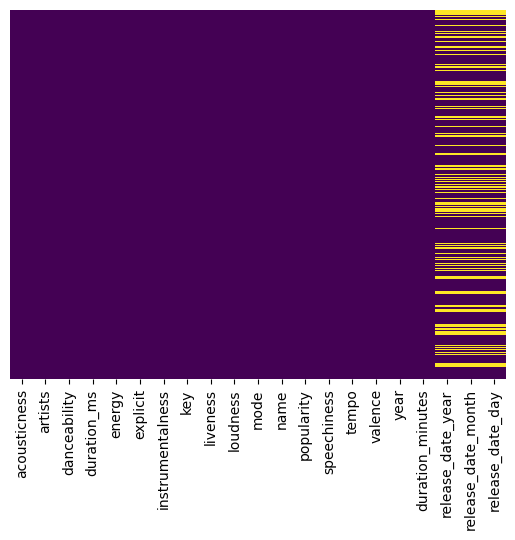

In [29]:
sns.heatmap(data_copy.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Análise das features do dataset com base no ano de lançamento

In [30]:
data_copy.groupby(by=['release_date_year']).mean(numeric_only=True)

acousticness  danceability    duration_ms    energy  \
release_date_year                                                        
1921.0                 0.825952      0.448667  186225.454545  0.238991   
1922.0                 0.925533      0.451978  158405.555556  0.205286   
1923.0                 0.970246      0.453070  161825.441860  0.271528   
1924.0                 0.994547      0.506234  168267.703125  0.318762   
1925.0                 0.980589      0.495084  182402.728972  0.210927   
...                         ...           ...            ...       ...   
2016.0                 0.260402      0.611667  222370.691149  0.607032   
2017.0                 0.273286      0.630107  212431.679528  0.595618   
2018.0                 0.252368      0.678795  204467.206461  0.601792   
2019.0                 0.258683      0.667129  202088.909031  0.605940   
2020.0                 0.228007      0.689239  201090.325511  0.626095   

                   explicit  instrumentalness       key  liveness   loudness  \
release_date_year                                                              
1921.0             0.212121          0.531011  5.606061  0.201464 -19.577030   
1922.0             0.000000          0.675013  5.155556  0.246464 -22.179400   
1923.0             0.000000          0.860756  5.139535  0.238163 -18.215488   
1924.0             0.000000          0.862517  5.609375  0.242758 -15.745062   
1925.0             0.000000          0.688751  5.457944  0.262645 -17.712897   
...                     ...               ...       ...       ...        ...   
2016.0             0.381197          0.065160  5.262211  0.187416  -7.621912   
2017.0             0.405145          0.078105  5.053948  0.193385  -7.990154   
2018.0             0.503511          0.028675  5.379565  0.172986  -7.006723   
2019.0             0.464368          0.052061  5.133662  0.168256  -7.307836   
2020.0             0.516654          0.029804  5.265329  0.179988  -6.882095   

                       mode  popularity  speechiness       tempo   valence  \
release_date_year                                                            
1921.0             0.515152    0.000000     0.089655   96.307667  0.482597   
1922.0             0.577778    0.222222     0.106171   98.299867  0.486089   
1923.0             0.534884    0.046512     0.088856  113.276581  0.607581   
1924.0             0.757812    0.000000     0.094725  123.367859  0.646203   
1925.0             0.607477    0.000000     0.137209  104.586561  0.503647   
...                     ...         ...          ...         ...       ...   
2016.0             0.612560   61.499816     0.118845  119.007552  0.432104   
2017.0             0.608432   64.993569     0.120903  118.140729  0.417538   
2018.0             0.588132   67.463834     0.137943  122.283846  0.450046   
2019.0             0.603612   70.250903     0.135213  120.004241  0.492104   
2020.0             0.591597   63.960636     0.150466  122.038962  0.494689   

                     year  duration_minutes  release_date_month  \
release_date_year                                                 
1921.0             1921.0          3.103758            4.606061   
1922.0             1922.0          2.640093            2.866667   
1923.0             1923.0          2.697091            5.232558   
1924.0             1924.0          2.804462            5.390625   
1925.0             1925.0          3.040045            4.878505   
...                   ...               ...                 ...   
2016.0             2016.0          3.706178            7.079692   
2017.0             2017.0          3.540528            6.944266   
2018.0             2018.0          3.407787            7.166433   
2019.0             2019.0          3.368148            7.130706   
2020.0             2020.0          3.351505            3.886450   

                   release_date_day  
release_date_year                    
1921.0                    18.212121  
1922.0        

Algumas conclusões interessantes:

- quanto mais próximas do atual, maior é a popularidade da música;

- as músicas tem-se tornado mais enérgicas;

- e têm perdido acústica e valência;

Gráfico da evolução da popularidade ao longo do tempo

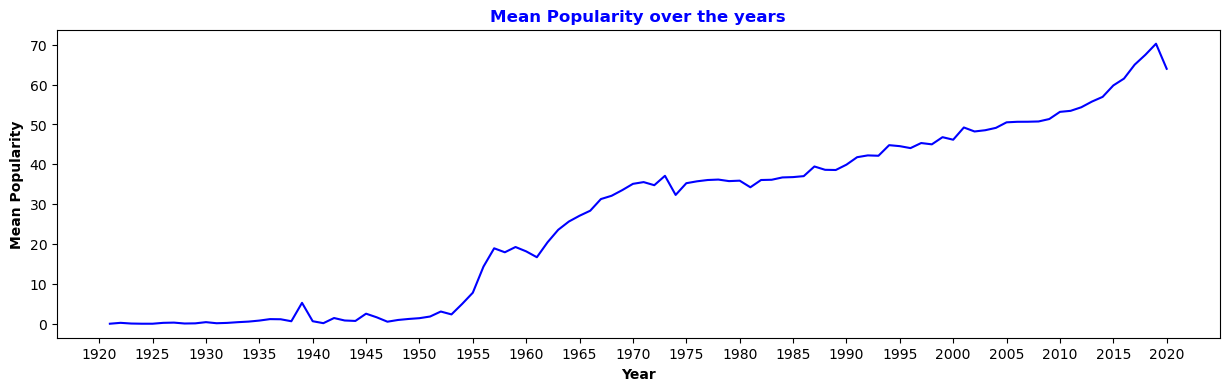

In [31]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = data_copy.groupby('release_date_year')['popularity'].mean().plot(color='blue')
ax.set_title('Mean Popularity over the years', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_xticks(range(1920, 2021, 5))
plt.show()

Evolução dos diferentes tons das músicas ao longo do tempo

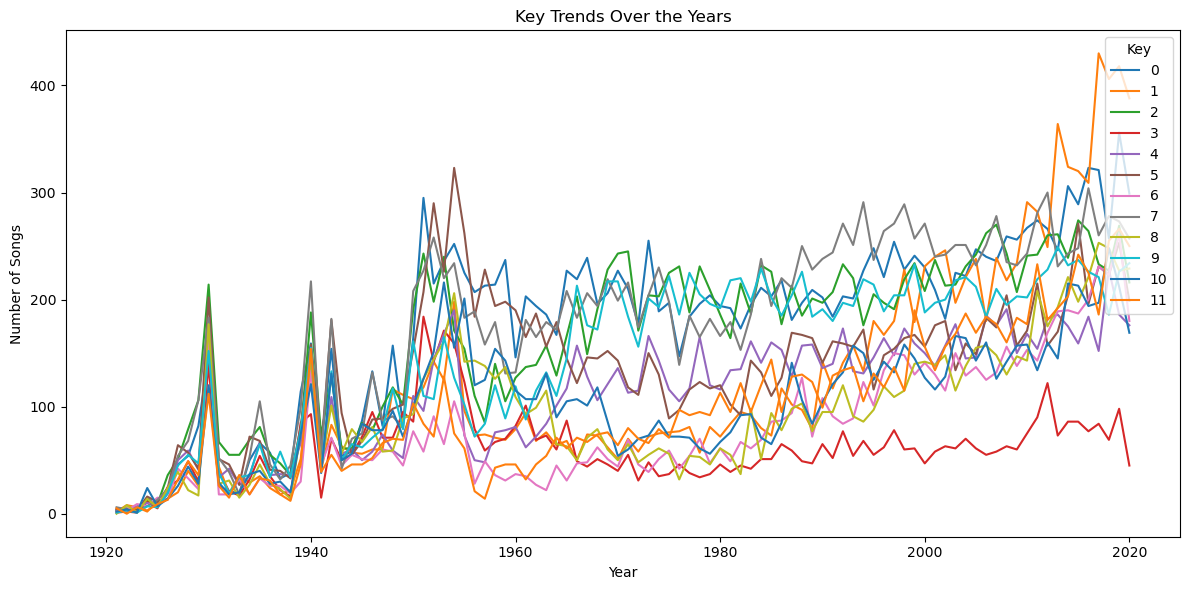

In [32]:
time_signature_counts = data_copy.groupby(['release_date_year', 'key']).size().unstack(fill_value=0)

# Create a line chart to visualize time signature trends over the years
time_signature_counts.plot(kind='line', figsize=(12, 6))
    
plt.title('Key Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Key', loc='upper right')

plt.tight_layout()
plt.show()

Evolução da feature Explicit ao longo do tempo

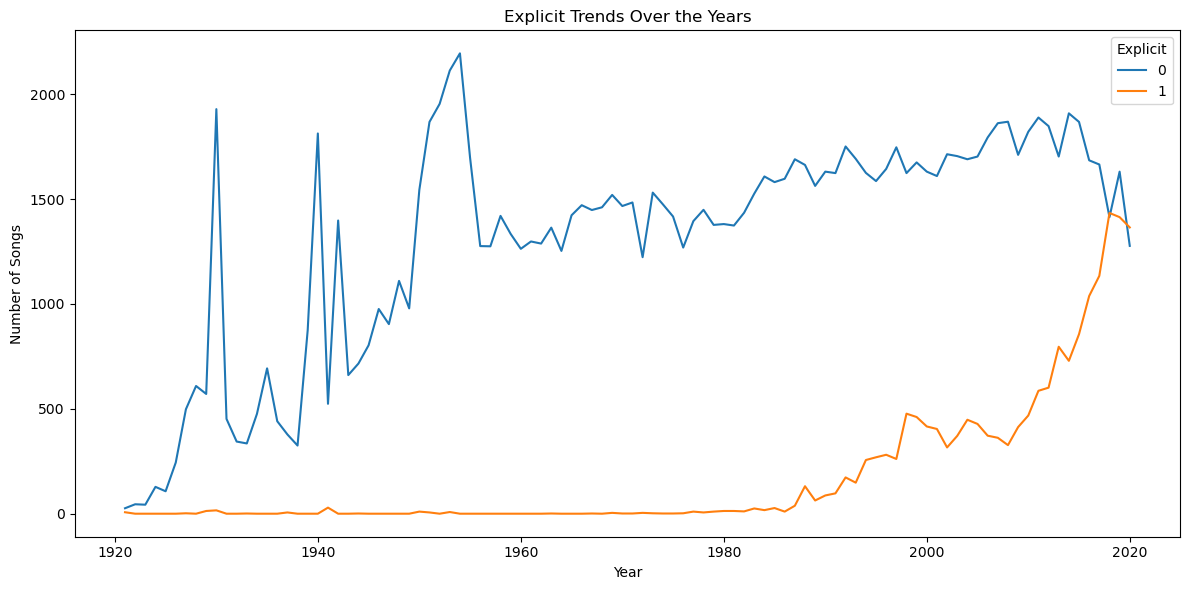

In [33]:
time_signature_counts = data_copy.groupby(['release_date_year', 'explicit']).size().unstack(fill_value=0)

# Create a line chart to visualize time signature trends over the years
time_signature_counts.plot(kind='line', figsize=(12, 6))
    
plt.title('Explicit Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Explicit', loc='upper right')

plt.tight_layout()
plt.show()

Curiosidade: Existem registos com explicit igual a 1 antes de 1950

In [34]:
data_copy[(data_copy['explicit'] == 1) & (data_copy['release_date_year'] <= 1950)]

acousticness          artists  danceability  duration_ms  energy  \
167           0.4450    Shorty Bralik         0.613       206785   0.550   
167           0.4450  ParkPlace Swagg         0.613       206785   0.550   
16254         0.1310    Shorty Bralik         0.461       176379   0.574   
16254         0.1310  ParkPlace Swagg         0.461       176379   0.574   
40271         0.1870    Shorty Bralik         0.556       172147   0.618   
...              ...              ...           ...          ...     ...   
161707        0.0158  ParkPlace Swagg         0.591       283000   0.602   
161707        0.0158            2Baba         0.591       283000   0.602   
162221        0.0583      ОТВАЛ БАWKN         0.862       134816   0.441   
162221        0.0583      Lil Uzi Kop         0.862       134816   0.441   
162221        0.0583        Cartier99         0.862       134816   0.441   

        explicit  instrumentalness  key  liveness  loudness  ...  \
167            1            0.0000    4    0.1070   -12.050  ...   
167            1            0.0000    4    0.1070   -12.050  ...   
16254          1            0.0000    1    0.3910    -8.586  ...   
16254          1            0.0000    1    0.3910    -8.586  ...   
40271          1            0.0000    8    0.1500    -9.996  ...   
...          ...               ...  ...       ...       ...  ...   
161707         1            0.0000    1    0.2780    -7.483  ...   
161707         1            0.0000    1    0.2780    -7.483  ...   
162221         1            0.0363    1    0.0982    -8.683  ...   
162221         1            0.0363    1    0.0982    -8.683  ...   
162221         1            0.0363    1    0.0982    -8.683  ...   

                   name popularity  speechiness    tempo  valence  year  \
167           No Lack'n          0       0.4040  116.576    0.352  1930   
167           No Lack'n          0       0.4040  116.576    0.352  1930   
16254        Boss Money          0       0.4530   83.493    0.445  1930   
16254        Boss Money          0       0.4530   83.493    0.445  1930   
40271           Gunfire          0       0.4730   70.830    0.528  1930   
...                 ...        ...          ...      ...      ...   ...   
161707  From the Bottom          0       0.3860  147.957    0.355  1930   
161707  From the Bottom          0       0.3860  147.957    0.355  1930   
162221          Phonk 2          0       0.0871   95.009    0.133  1941   
162221          Phonk 2          0       0.0871   95.009    0.133  1941   
162221          Phonk 2          0       0.0871   95.009    0.133  1941   

        duration_minutes  release_date_year  release_date_month  \
167             3.446417             1930.0                 5.0   
167             3.446417             1930.0                 5.0   
16254           2.939650             1930.0                 5.0   
16254           2.939650             1930.0                 5.0   
40271           2.869117             1930.0                 5.0   
...                  ...                ...                 ...   
161707          4.716667             1930.0                 5.0   
161707          4.716667             1930.0                 5.0   
162221          2.246933             1941.0                 5.0   
162221          2.246933             1941.0                 5.0   
162221          2.246933             1941.0                 5.0   

        release_date_day  
167                 29.0  
167                 29.0  
16254               29.0  
16254               29.0  
40271               29.0  
...                  ...  
161707              29.0  
161707              29.0  
162221               5.0  
162221               5.0  
162221               5.0  

[85 rows x 21 columns]

Evolução do modo da música ao longo do tempo

In [35]:
mode_counts = data_copy.groupby(['release_date_year', 'mode']).size().unstack(fill_value=0)

# Create a line chart to visualize time signature trends over the years
mode_counts.plot(kind='line', figsize=(12, 6))
    
plt.title('Mode Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Mode', loc='upper right')

plt.tight_layout()
plt.show()

Major = 1, Minor = 0

Mode vs Key

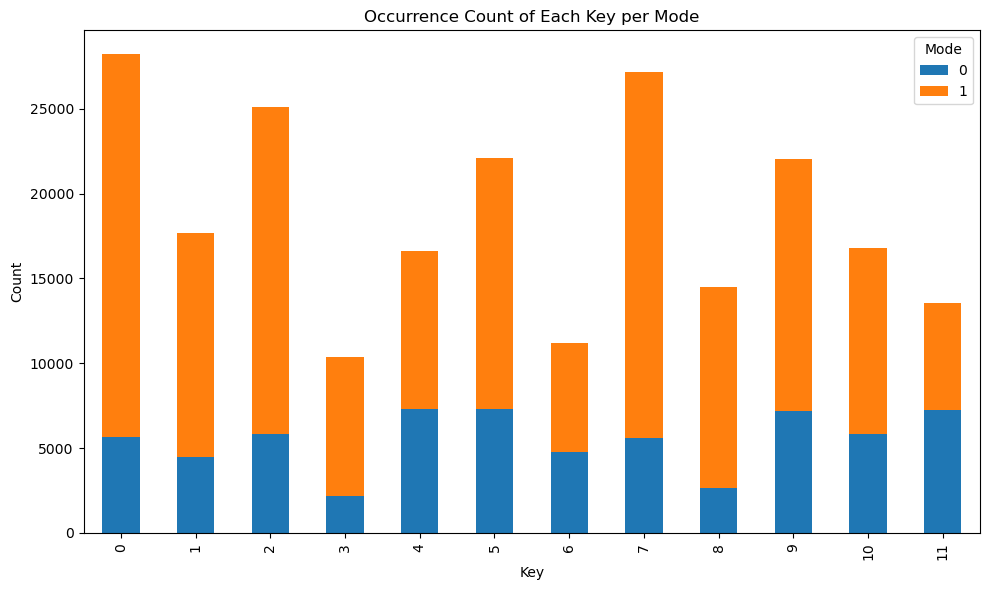

In [36]:
key_mode_counts = data_copy.groupby(['key', 'mode']).size().unstack(fill_value=0)

# Plotting the bar chart
key_mode_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Occurrence Count of Each Key per Mode')

# Show plot
plt.legend(title='Mode', loc='upper right')
plt.tight_layout()
plt.show()

Evolução da energia nas músicas ao longo do tempo

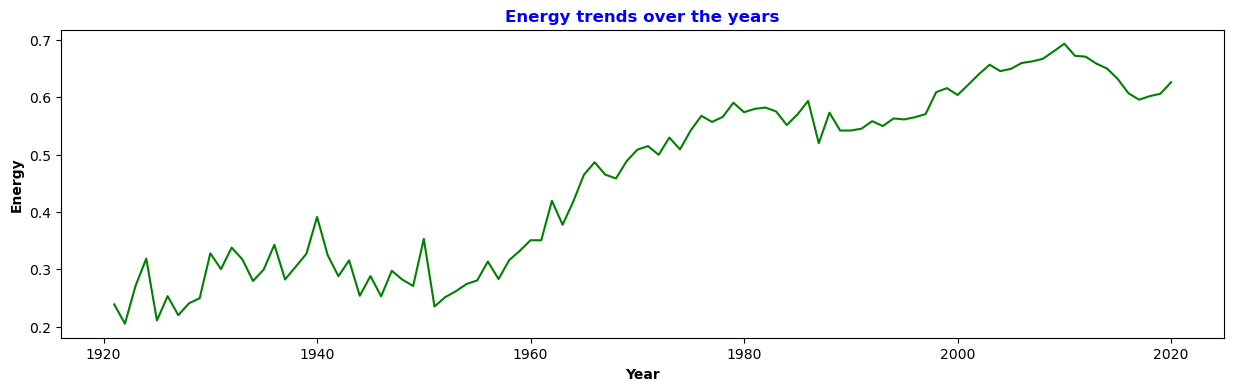

In [37]:
fig, ax = plt.subplots(figsize=(15, 4))
data_copy.groupby('release_date_year')['energy'].mean().plot(color='green', ax=ax)
ax.set_title('Energy trends over the years', c='blue', weight='bold')
ax.set_ylabel('Energy', weight='bold')
ax.set_xlabel('Year', weight='bold')
plt.show()

Vamos verificar se os anos de lançamento das músicas estão bem distribuídos

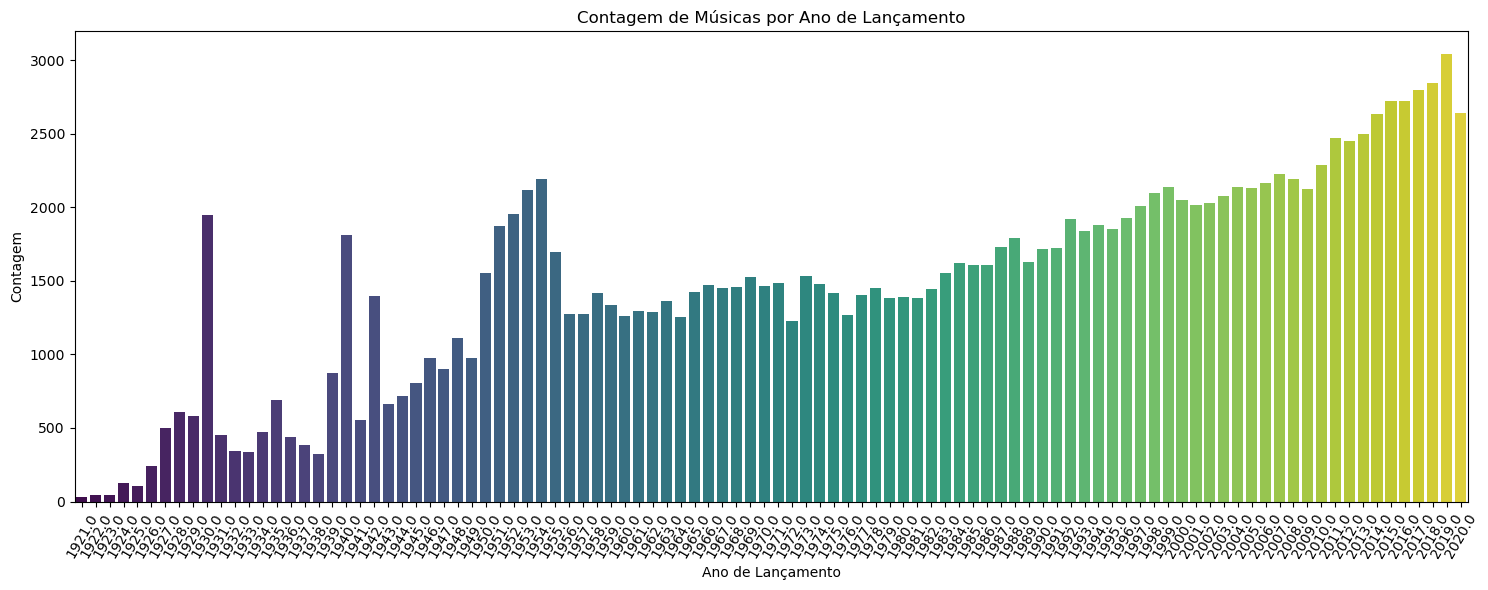

In [38]:
counts = data_copy['release_date_year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Contagem de Músicas por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Verificamos que em geral estão bem distribuídas

Análise da popularidade com base no mês em que a mesma foi lançada

In [39]:
data_copy.groupby(by=['release_date_month']).mean(numeric_only=True)

acousticness  danceability    duration_ms    energy  \
release_date_month                                                        
1.0                     0.584605      0.526334  233700.387571  0.447399   
2.0                     0.386527      0.561617  238534.999835  0.548749   
3.0                     0.398061      0.561935  233607.786497  0.556747   
4.0                     0.369987      0.566073  229325.229924  0.563090   
5.0                     0.358612      0.570361  231532.803769  0.563478   
6.0                     0.357202      0.568080  230584.433142  0.574115   
7.0                     0.393537      0.557942  233810.588195  0.551231   
8.0                     0.383124      0.572394  231930.415619  0.565171   
9.0                     0.360783      0.567360  238378.909167  0.570600   
10.0                    0.346000      0.564922  241670.673900  0.583688   
11.0                    0.391488      0.558473  232110.828741  0.552292   
12.0                    0.690665      0.552465  219780.908349  0.415730   

                    explicit  instrumentalness       key  liveness   loudness  \
release_date_month                                                              
1.0                 0.061080          0.174876  5.162654  0.203171 -12.128403   
2.0                 0.159365          0.119112  5.296082  0.219898 -10.116119   
3.0                 0.155723          0.136107  5.198103  0.207951  -9.795910   
4.0                 0.167661          0.118463  5.247830  0.207502  -9.570300   
5.0                 0.181382          0.114218  5.211650  0.205832  -9.774409   
6.0                 0.146577          0.095634  5.172725  0.205518  -9.535925   
7.0                 0.149055          0.138337  5.139263  0.214817 -10.297716   
8.0                 0.146261          0.105885  5.213898  0.209024  -9.540741   
9.0                 0.145396          0.120054  5.304275  0.199944  -9.524728   
10.0                0.137332          0.112104  5.241511  0.214212  -9.328551   
11.0                0.145050          0.124938  5.179607  0.216211  -9.994889   
12.0                0.098499          0.206081  5.258537  0.222803 -10.855118   

                        mode  popularity  speechiness       tempo   valence  \
release_date_month                                                            
1.0                 0.708304   27.658254     0.081814  115.018449  0.534564   
2.0                 0.686560   41.687386     0.092062  118.448670  0.524510   
3.0                 0.680177   41.130590     0.094452  119.401118  0.532322   
4.0                 0.674037   43.672273     0.092532  118.839913  0.517836   
5.0                 0.679726   44.522444     0.101389  118.389700  0.507700   
6.0                 0.691964   41.355548     0.090478  119.600594  0.533109   
7.0                 0.706786   38.940024     0.097173  118.580246  0.522166   
8.0                 0.701655   42.244474     0.089516  118.632494  0.537291   
9.0                 0.682346   42.476116     0.094369  119.384500  0.516876   
10.0                0.699216   42.203838     0.089511  120.118855  0.523768   
11.0                0.700655   40.351943     0.092555  118.111228  0.525639   
12.0                0.676762   21.788342     0.110844  113.526954  0.583578   

                           year  duration_minutes  release_date_year  \
release_date_month                                                     
1.0                 1974.589866          3.895006        1974.589866   
2.0                 1990.043478          3.975583        1990.043478   
3.0                 1988.454601          3.893463        1988.454601   
4.0                 1991.590342          3.822087        1991.590342   
5.0                 1992.575899          3.858880        1992.575899   
6.0                 1990.957908          3.843074        1990.957908   
7.0                 1986.705698          3.896843        1986.705698   
8.0                 1989.035076          3.865507        1989.035076   
9.0    

<Axes: >

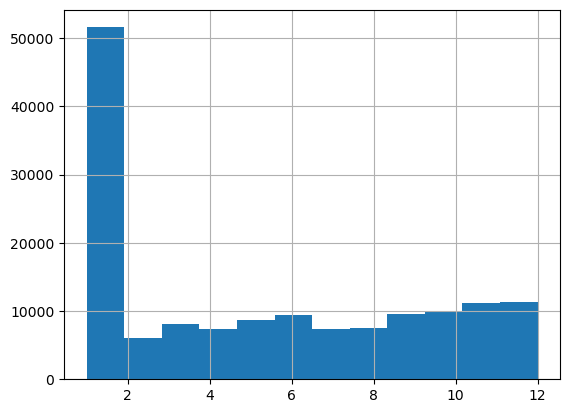

In [40]:
data_copy['release_date_month'].hist(bins=12)

A maioria das músicas são de Janeiro

In [41]:
data_copy[data_copy['release_date_month'] == 1]['artists'].value_counts()

artists
Francisco Canaro         536
Ella Fitzgerald          377
Wiener Philharmoniker    234
Unspecified              228
Giorgos Papasideris      217
                        ... 
Clyde Boudreaux            1
OHGEESY                    1
Carnage                    1
6LACK                      1
Alexander 23               1
Name: count, Length: 10359, dtype: int64

As músicas lançadas em Janeiro são de compositores mais antigos

Análise da popularidade com base no dia do mês em que a mesma foi lançada

In [42]:
data_copy.groupby(by=['release_date_day']).mean(numeric_only=True)

acousticness  danceability    duration_ms    energy  \
release_date_day                                                        
1.0                   0.588711      0.520941  234566.465668  0.443234   
2.0                   0.387773      0.554990  229959.107466  0.563009   
3.0                   0.383157      0.551365  240959.070276  0.544027   
4.0                   0.387371      0.569205  223130.852841  0.560941   
5.0                   0.379582      0.574980  236536.281904  0.568069   
6.0                   0.389245      0.570461  225092.323344  0.544376   
7.0                   0.406726      0.559666  230961.739049  0.538334   
8.0                   0.392050      0.545126  232421.065171  0.555596   
9.0                   0.312076      0.570975  237480.147746  0.597133   
10.0                  0.405909      0.551692  229524.263510  0.542670   
11.0                  0.433120      0.561480  230436.140083  0.530196   
12.0                  0.407233      0.576317  228550.566687  0.565143   
13.0                  0.381012      0.576118  226204.249921  0.553403   
14.0                  0.397875      0.573605  229956.518072  0.572006   
15.0                  0.400659      0.569299  233093.517542  0.546420   
16.0                  0.360539      0.599849  233281.019536  0.575296   
17.0                  0.350498      0.572815  237254.038319  0.576149   
18.0                  0.402400      0.569421  233697.973329  0.560209   
19.0                  0.371920      0.570363  232016.804668  0.573222   
20.0                  0.387571      0.583172  233719.766080  0.559957   
21.0                  0.353771      0.560479  230674.689930  0.591764   
22.0                  0.357743      0.562713  230784.298209  0.566312   
23.0                  0.360751      0.569527  236511.114946  0.589240   
24.0                  0.390562      0.571129  228213.809213  0.576033   
25.0                  0.414879      0.566795  227877.289566  0.539811   
26.0                  0.377388      0.571312  224868.557461  0.568388   
27.0                  0.296547      0.577480  238183.083089  0.607159   
28.0                  0.316854      0.571073  242389.755906  0.600998   
29.0                  0.321582      0.585168  240654.955148  0.572814   
30.0                  0.340246      0.583298  241558.042386  0.568659   
31.0                  0.729790      0.571007  222708.882688  0.399930   

                  explicit  instrumentalness       key  liveness   loudness  \
release_date_day                                                              
1.0               0.054720          0.175025  5.178606  0.204646 -12.232287   
2.0               0.131599          0.129788  5.366893  0.216037  -9.681491   
3.0               0.135508          0.130547  5.082717  0.199719  -9.957780   
4.0               0.147502          0.117894  5.384326  0.210611  -9.554623   
5.0               0.165429          0.118889  5.256583  0.229753  -9.316737   
6.0               0.192009          0.128631  5.273030  0.207403  -9.779561   
7.0               0.125047          0.142273  5.197304  0.213610 -10.682580   
8.0               0.161389          0.152086  5.175530  0.236756 -10.205644   
9.0               0.168277          0.103455  5.200081  0.200190  -8.845426   
10.0              0.151947          0.101534  5.047356  0.221728  -9.923080   
11.0              0.147087          0.151467  5.057943  0.202410 -10.328994   
12.0              0.155502          0.158605  5.127093  0.218573  -9.477310   
13.0              0.174159          0.140369  5.380698  0.208673  -9.718212   
14.0              0.171211          0.115515  5.214014  0.223119  -9.596204   
15.0              0.156951          0.134766  5.061725  0.194147 -10.026936   
16.0              0.220199          0.122151  5.421523  0.212669  -9.264813   
17.0              0.166723          0.109972  5.255798  0.199075  -9.254496   
18.0              0.154339          0.137445  5.257112  0.197556  -9.430344   
19.0              0.121364  

<Axes: >

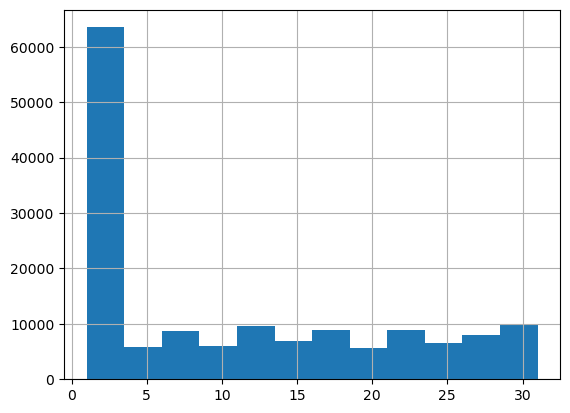

In [43]:
data_copy['release_date_day'].hist(bins=12)

São as mesmas músicas. Músicas mais antigas são lançadas no dia 1 de Janeiro

Análise do campo explicit

In [44]:
data_copy['explicit'].value_counts()

explicit
0    204725
1     20724
Name: count, dtype: int64

## Missing Values

Vamos verificar a existência de missing values

<Axes: >

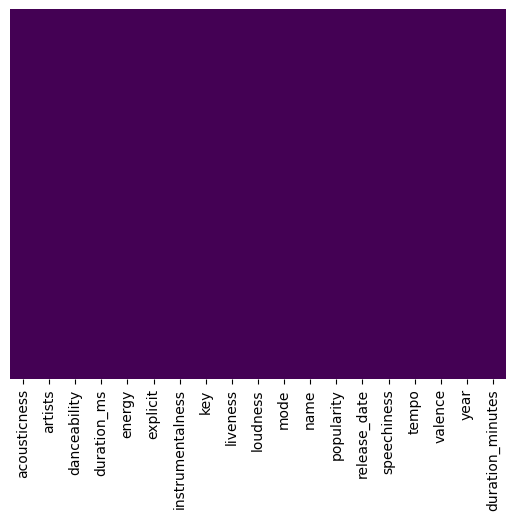

In [45]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como podemos ver, não há missing values no nosso dataset.

## Correlações

Distribuição da popularidade removendo as músicas com popularidade igual a zero

<Axes: >

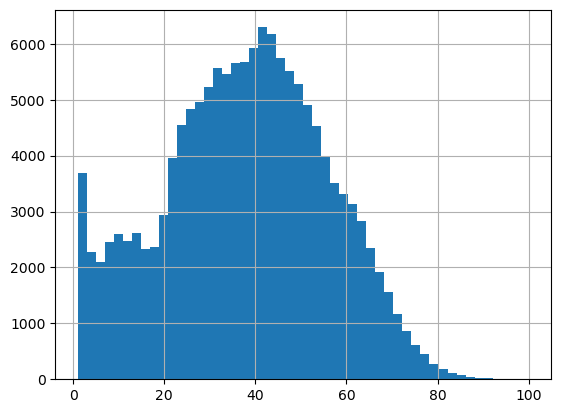

In [46]:
data[data['popularity'] > 0]['popularity'].hist(bins=50)

### Correlação de pearson

<Axes: >

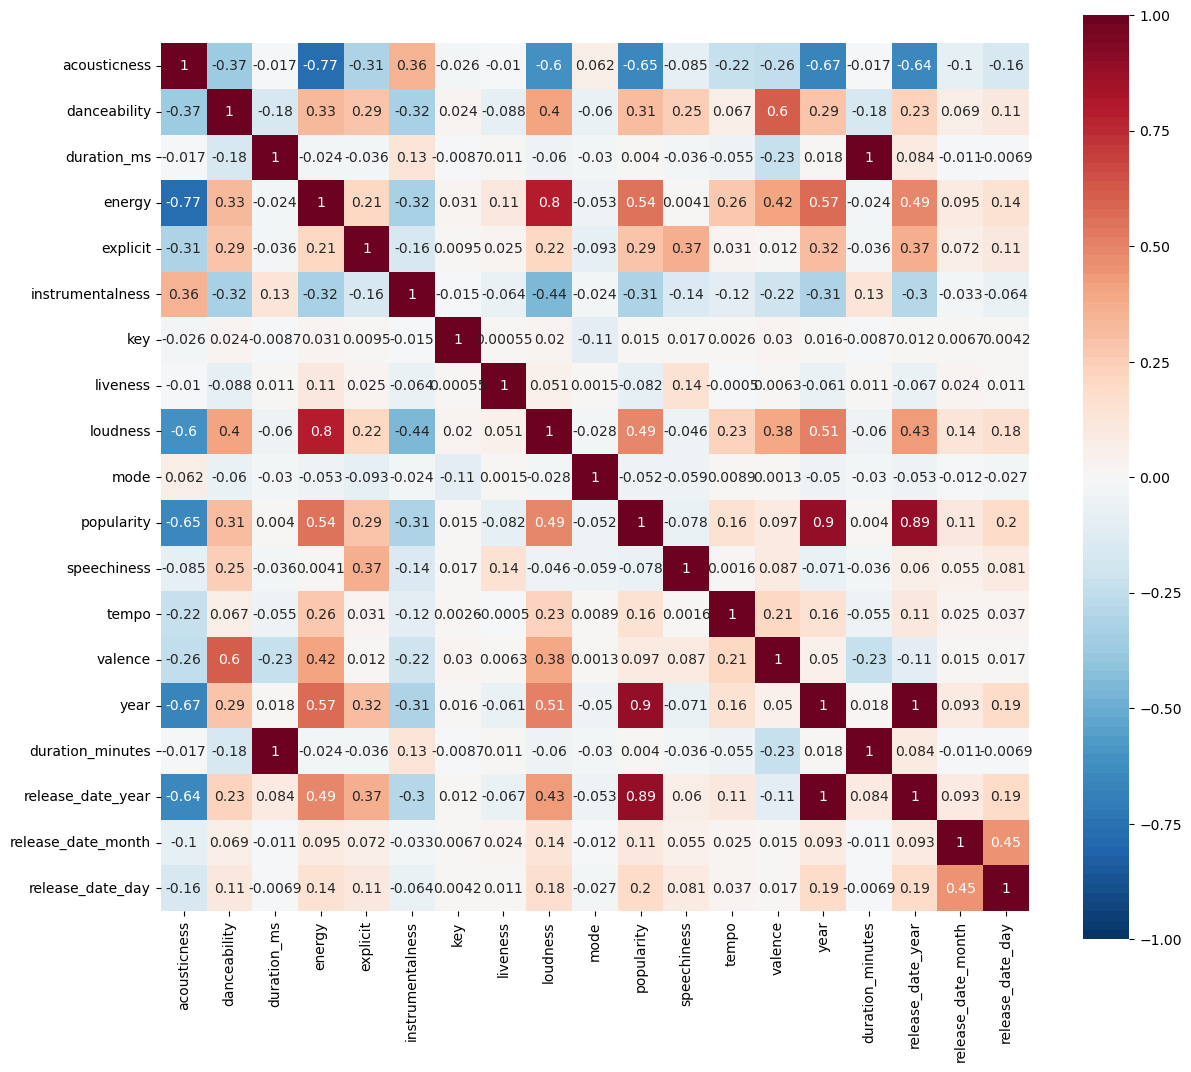

In [47]:
corr_matrix = data_copy.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

### Correlação de Spearman

<Axes: >

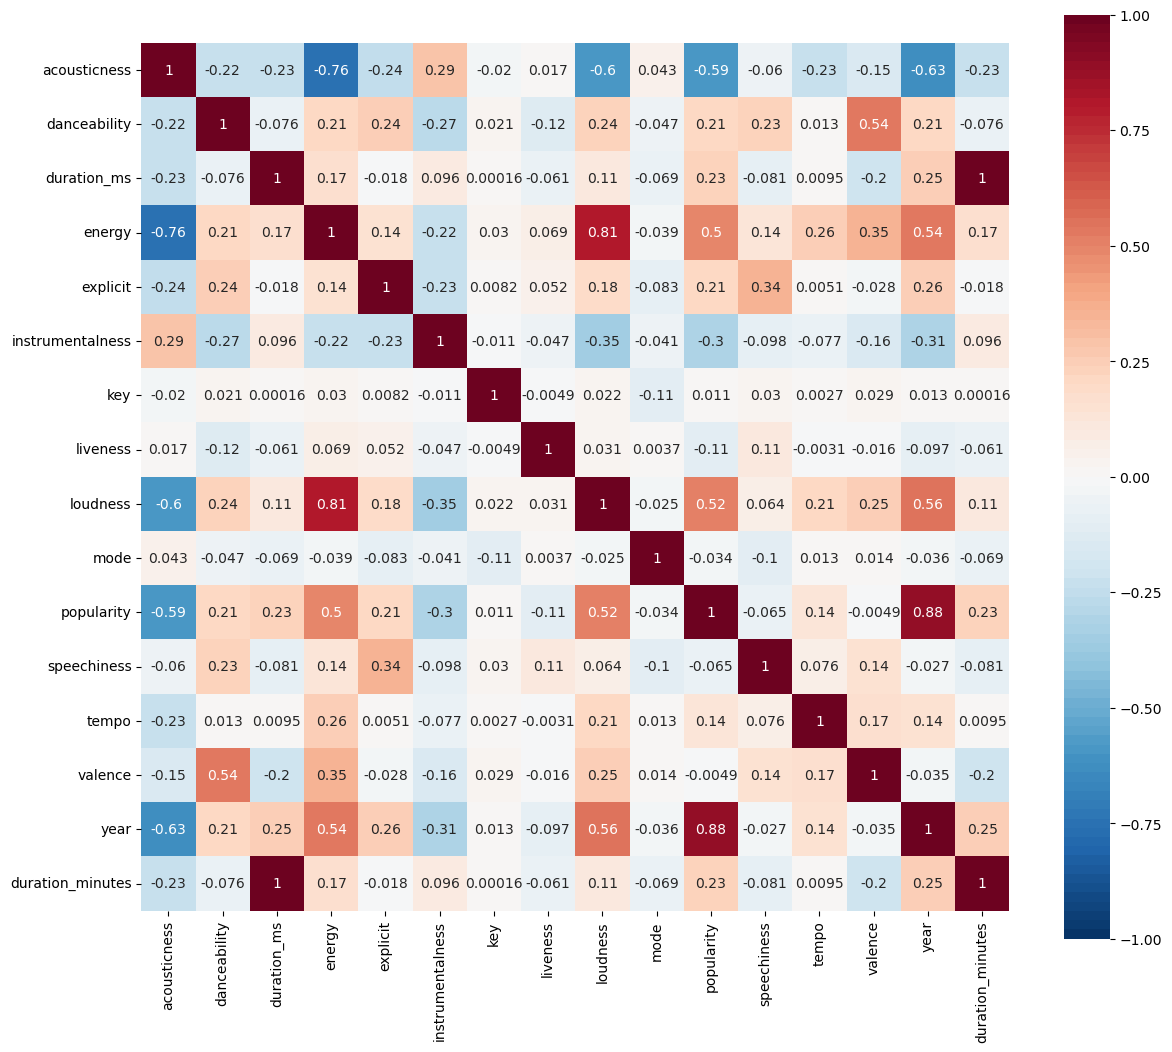

In [48]:
corr_matrix = data.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

### Correlação de Kendall

In [49]:
corr_matrix = data.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

<Axes: >

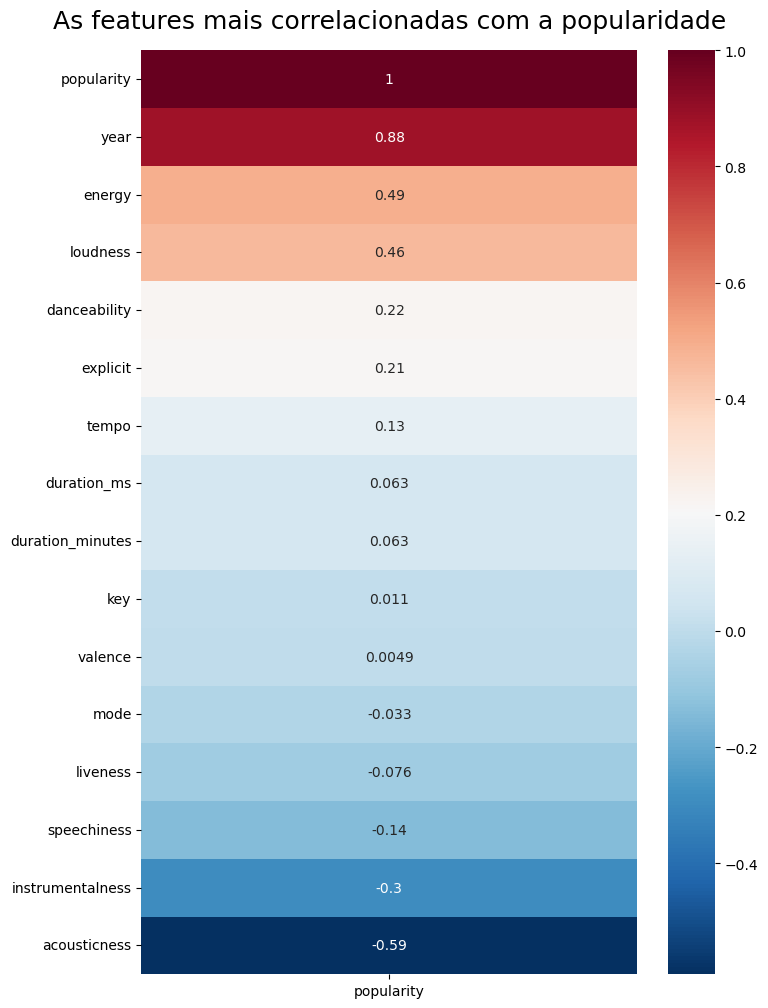

In [52]:
corr = data.corr(numeric_only=True)[['popularity']].sort_values(by='popularity', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr, annot=True, cmap='RdBu_r')
heatmap.set_title('As features mais correlacionadas com a popularidade', fontdict={'fontsize':18}, pad=16);

Das 3 correlações analisadas podemos ver que as features com maior correlação com a popularidade são:
- year;
- loudness;
- instrumentalness;
- explicit;
- energy;
- danceability;
- accousticness;

Podemos também visualizar a distribuição dos dados coluna vs coluna

c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

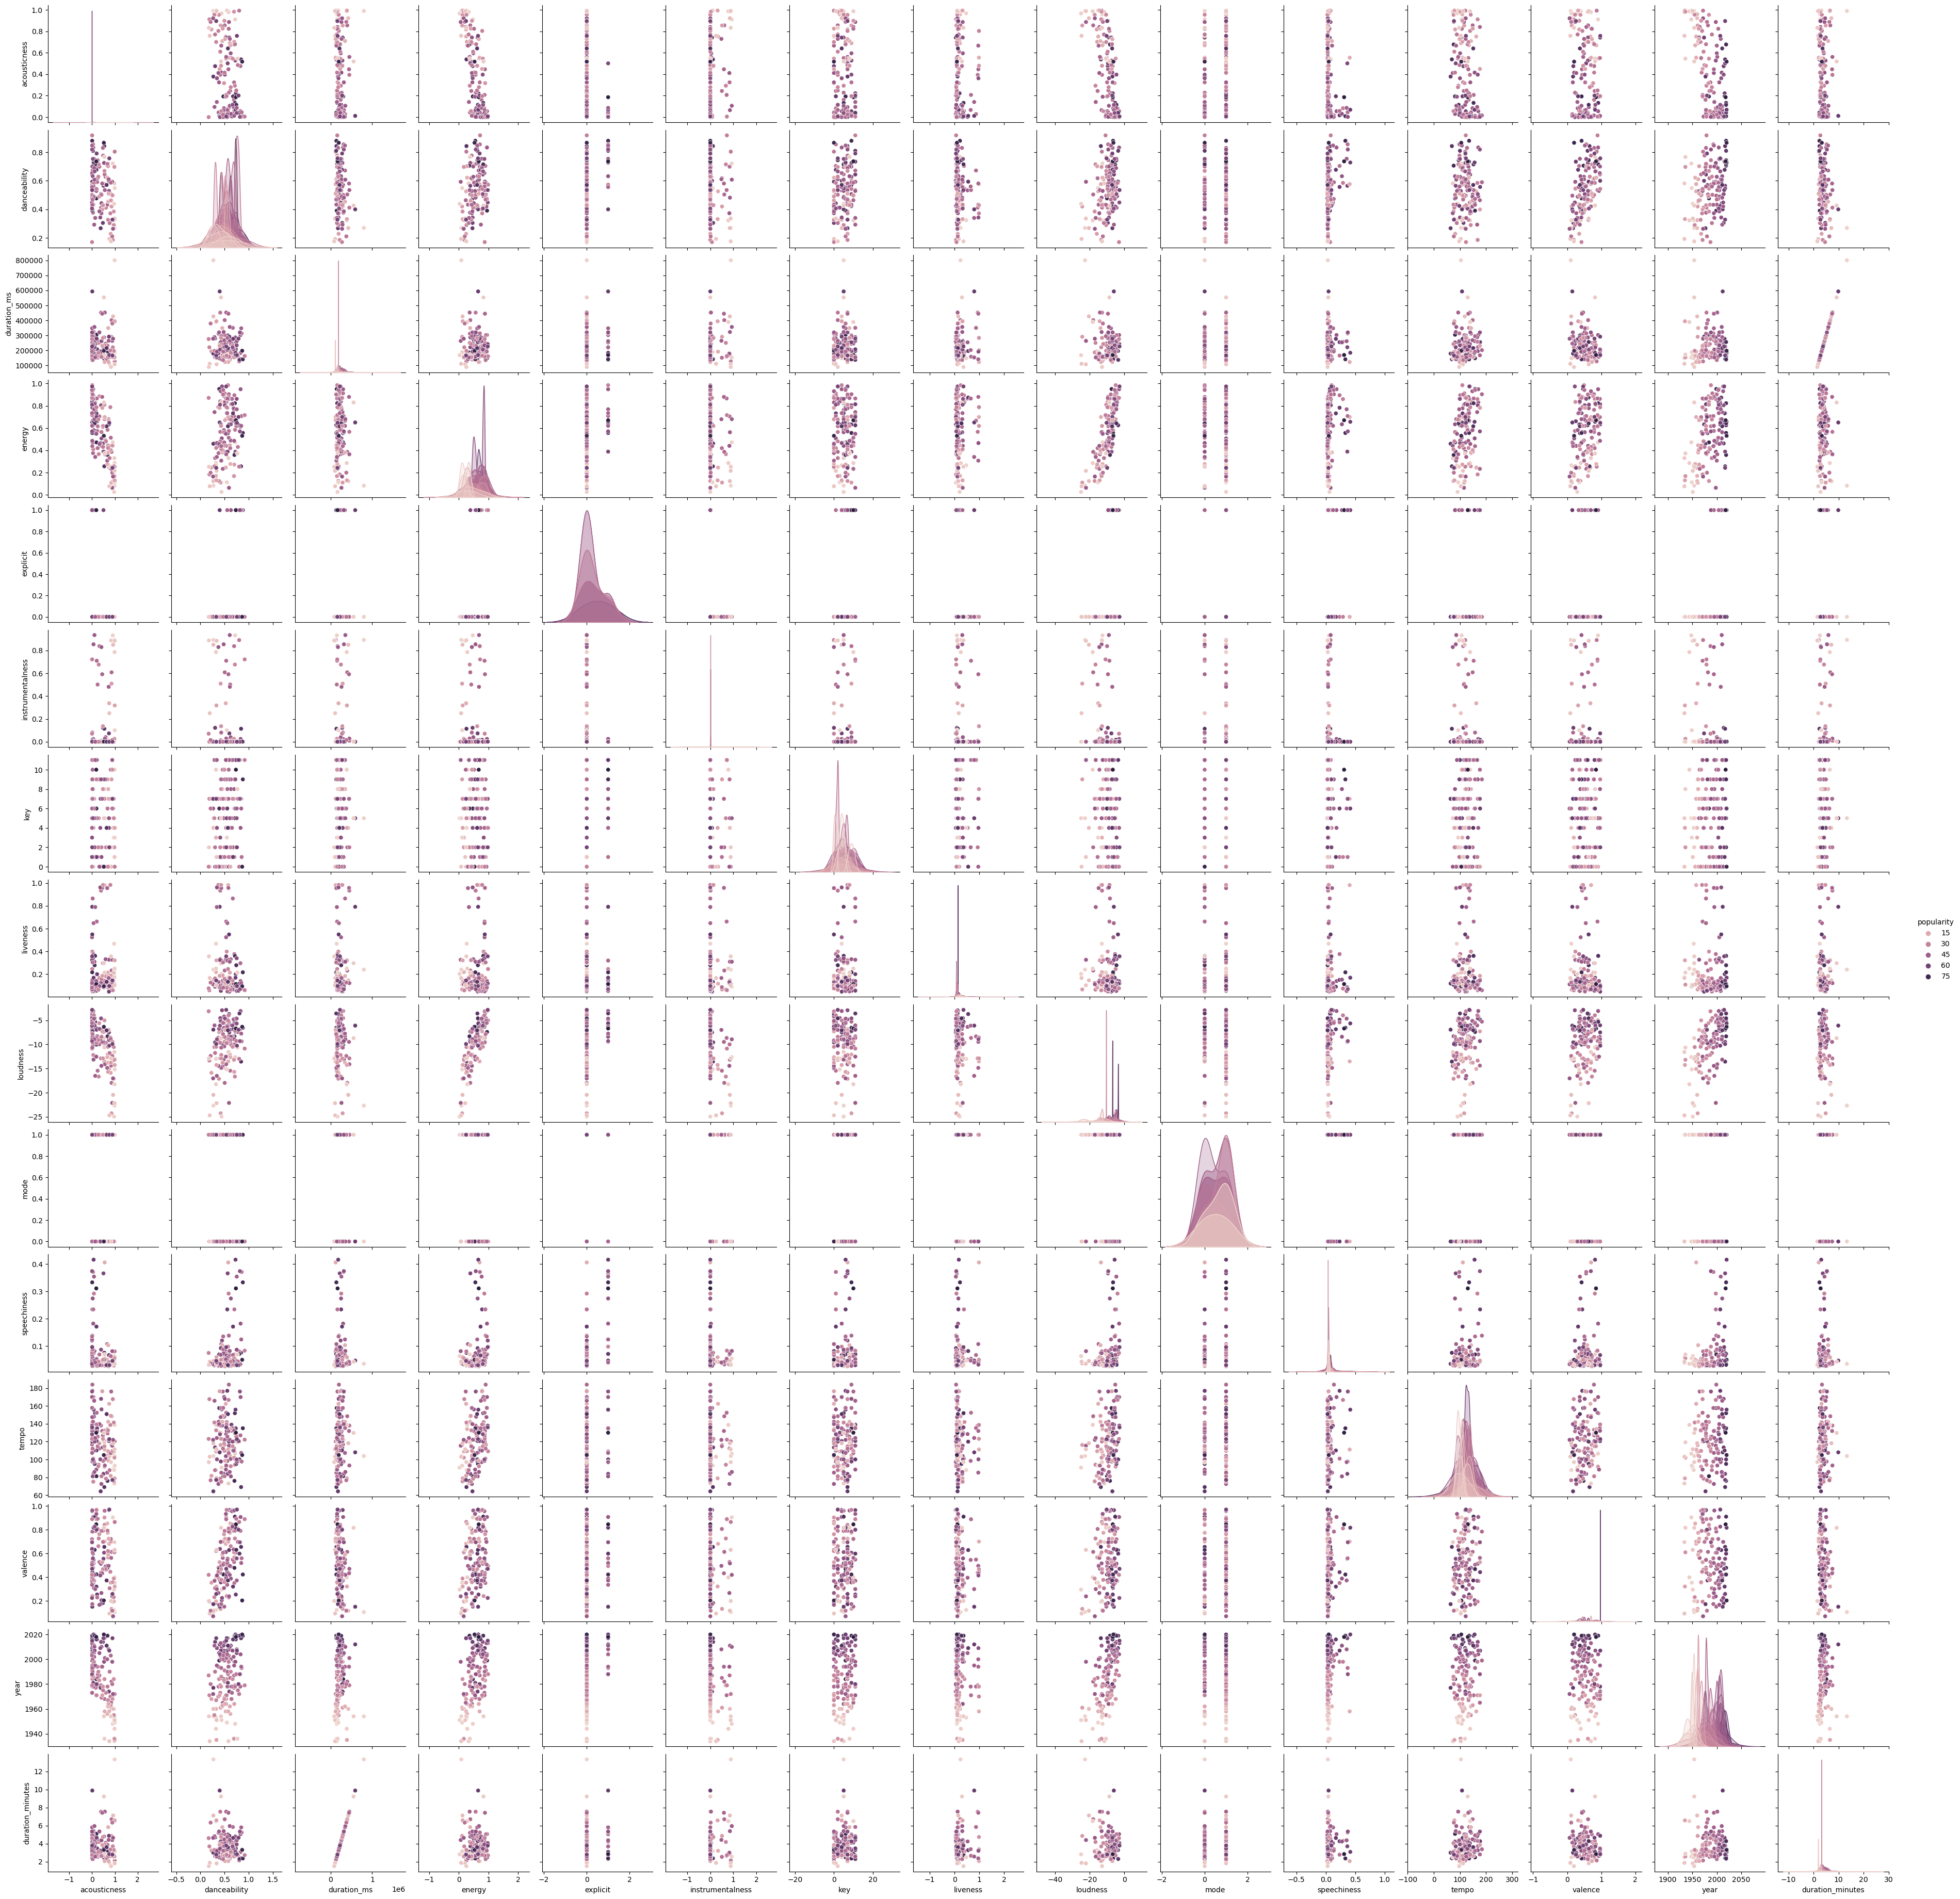

In [57]:
# muito demorado
# sns.pairplot(data.sample(frac=0.001, random_state=2023), hue='popularity')

## Outliers

Acousticness

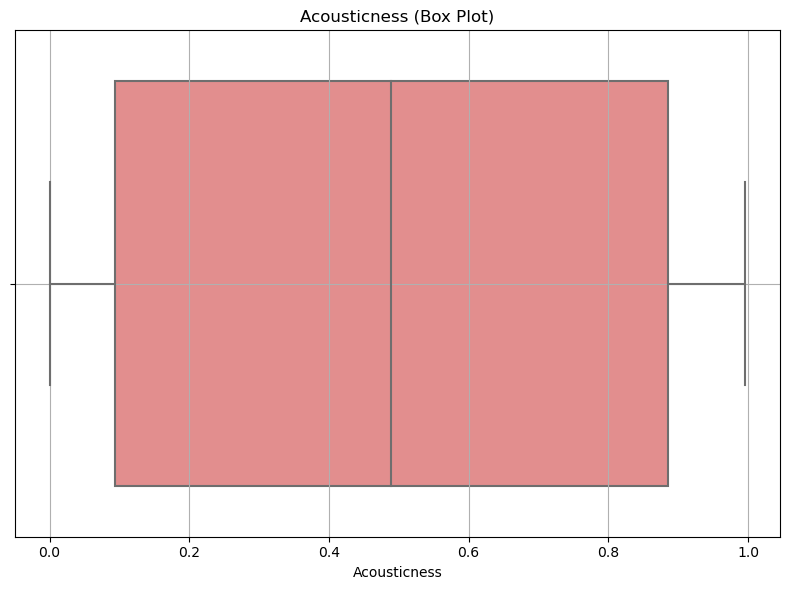

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['acousticness'], color='lightcoral')
    
plt.title('Acousticness (Box Plot)')
plt.xlabel('Acousticness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

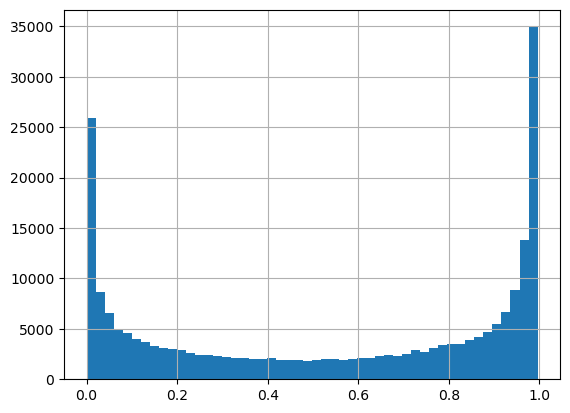

In [54]:
data_copy['acousticness'].hist(bins=50)

Danceabilidade

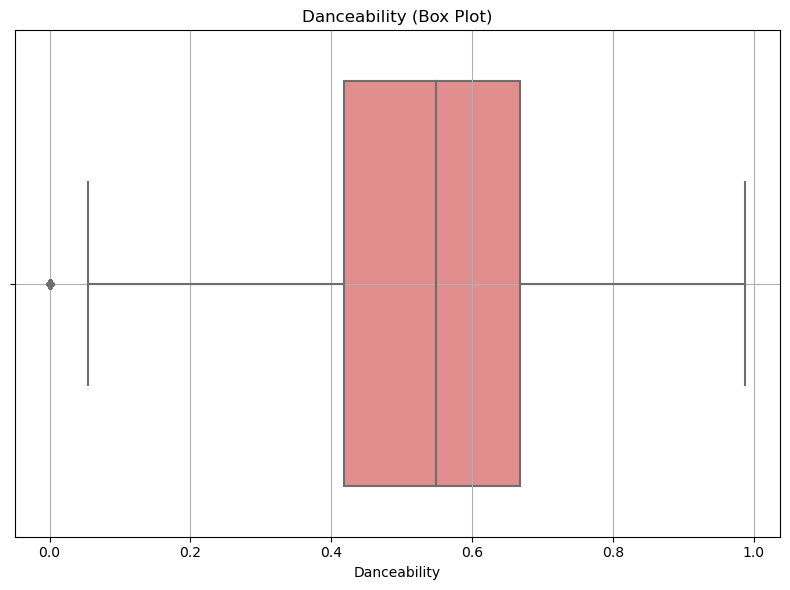

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['danceability'], color='lightcoral')
    
plt.title('Danceability (Box Plot)')
plt.xlabel('Danceability')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

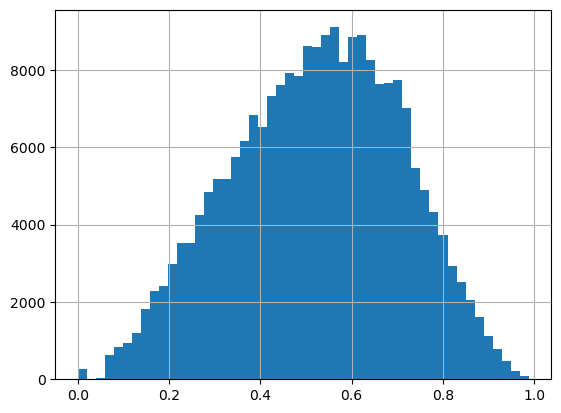

In [56]:
data_copy['danceability'].hist(bins=50)

Que músicas não têm danceabilidade?

In [57]:
data_copy[data_copy['danceability'] == 0]

acousticness         artists  danceability  duration_ms    energy  \
1269        0.976000  Richard Wagner           0.0       212667  0.085400   
1269        0.976000       Keilberth           0.0       212667  0.085400   
1269        0.976000          Varnay           0.0       212667  0.085400   
1269        0.976000          Lorenz           0.0       212667  0.085400   
1269        0.976000            Uhde           0.0       212667  0.085400   
...              ...             ...           ...          ...       ...   
161927      0.000061    Apocolothoth           0.0       144000  0.000020   
164201      0.862000      Bill Cosby           0.0       215280  0.770000   
169522      0.913000        Granular           0.0       205161  0.000164   
169743      0.000013   Naturaleza FX           0.0       150879  0.000020   
169770      0.957000        Granular           0.0       146061  0.148000   

        explicit  instrumentalness  key  liveness  loudness  ...  \
1269           0          0.000105    7     0.343   -21.505  ...   
1269           0          0.000105    7     0.343   -21.505  ...   
1269           0          0.000105    7     0.343   -21.505  ...   
1269           0          0.000105    7     0.343   -21.505  ...   
1269           0          0.000105    7     0.343   -21.505  ...   
...          ...               ...  ...       ...       ...  ...   
161927         0          0.949000    1     0.900     2.799  ...   
164201         0          0.000002    9     0.694   -15.316  ...   
169522         0          0.910000   10     0.155   -31.221  ...   
169743         0          0.208000    1     0.311   -16.873  ...   
169770         0          0.168000    5     0.112   -22.012  ...   

                                                     name popularity  \
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
...                                                   ...        ...   
161927                                              Idiot          0   
164201                                       Noah: Right!         16   
169522                               White Noise - 700 hz         64   
169743                                 Colors of the Rain         68   
169770                                Brown Noise 750 LPF         69   

        speechiness  tempo  valence  year  duration_minutes  \
1269            0.0    0.0      0.0  1952           3.54445   
1269            0.0    0.0      0.0  1952           3.54445   
1269            0.0    0.0      0.0  1952           3.54445   
1269            0.0    0.0      0.0  1952           3.54445   
1269            0.0    0.0      0.0  1952           3.54445   
...             ...    ...      ...   ...               ...   
161927          0.0    0.0      0.0  1936           2.40000   
164201          0.0    0.0      0.0  1963           3.58800   
169522          0.0    0.0      0.0  2017           3.41935   
169743          0.0    0.0      0.0  2019           2.51465   
169770          0.0    0.0      0.0  2019           2.43435   

        release_date_year  release_date_month  release_date_day  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
...                   ...                 ...               ...  
161927             1936.0                 5.0              27.0  
164201                NaN                 NaN               NaN  
169522             2017.0                10.0     

Duration

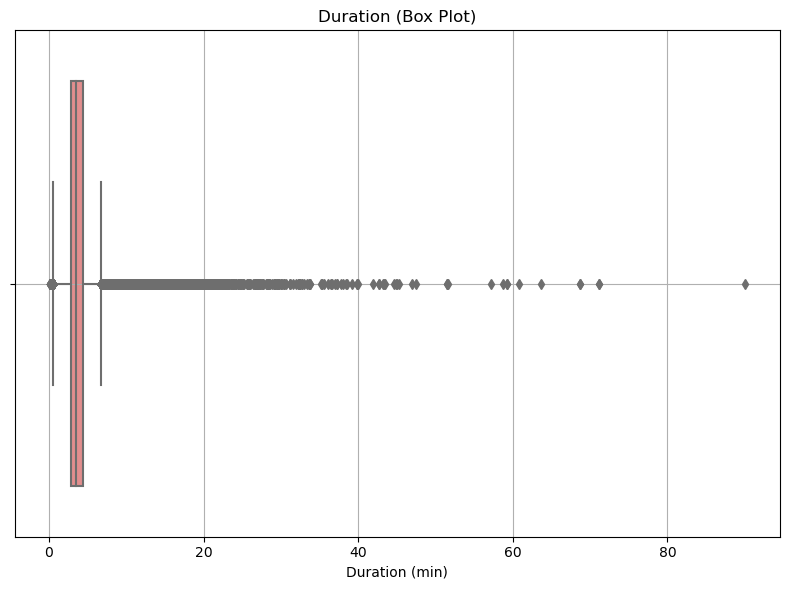

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['duration_minutes'], color='lightcoral')
    
plt.title('Duration (Box Plot)')
plt.xlabel('Duration (min)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
data_copy['duration_minutes'].hist(bins=50)

<Axes: >

Energy

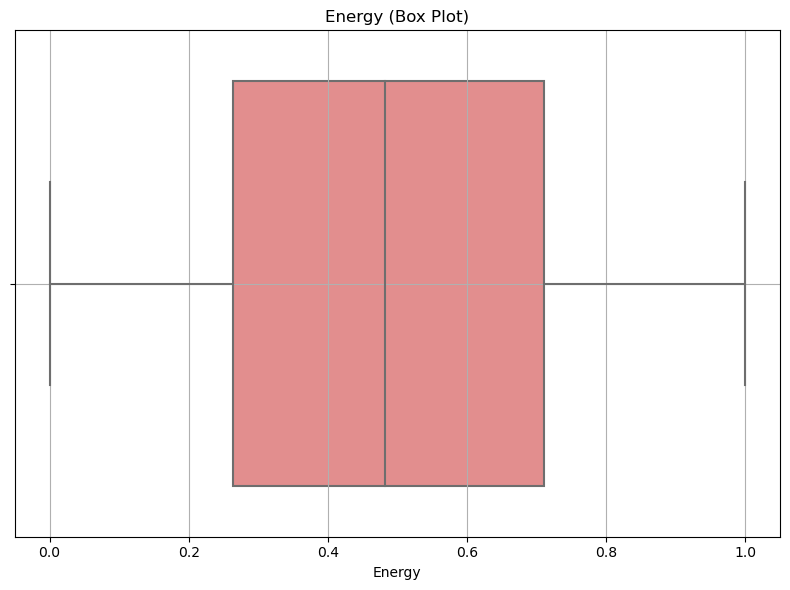

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['energy'], color='lightcoral')
    
plt.title('Energy (Box Plot)')
plt.xlabel('Energy')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

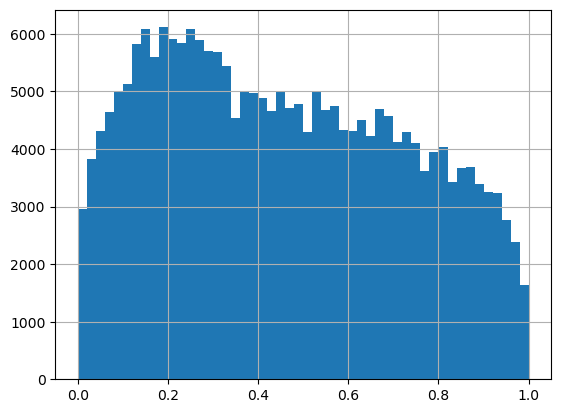

In [61]:
data_copy['energy'].hist(bins=50)

Instrumentalness

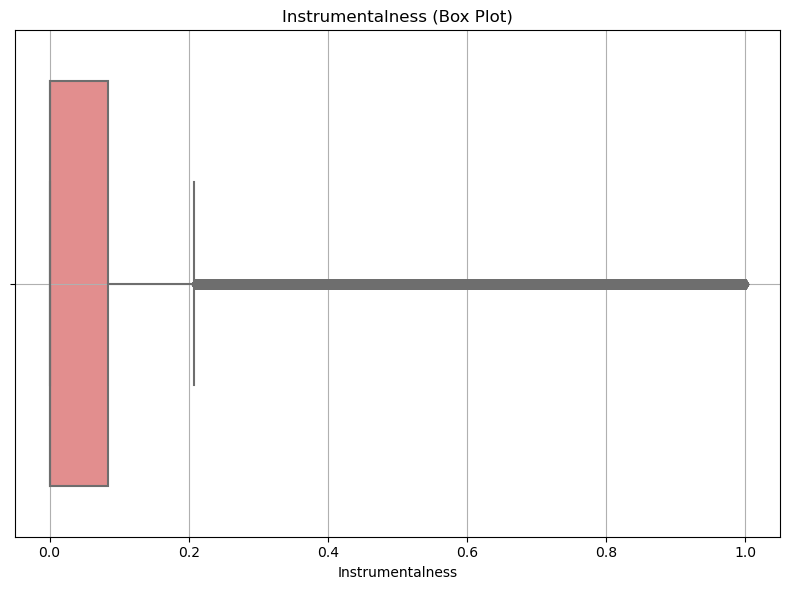

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['instrumentalness'], color='lightcoral')
    
plt.title('Instrumentalness (Box Plot)')
plt.xlabel('Instrumentalness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
data_copy['instrumentalness'].hist(bins=50)

<Axes: >

In [64]:
data_copy[data_copy['instrumentalness'] > 0.25].info()

<class 'pandas.core.frame.DataFrame'>
Index: 51593 entries, 0 to 169835
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acousticness        51593 non-null  float64
 1   artists             51593 non-null  object 
 2   danceability        51593 non-null  float64
 3   duration_ms         51593 non-null  int64  
 4   energy              51593 non-null  float64
 5   explicit            51593 non-null  int64  
 6   instrumentalness    51593 non-null  float64
 7   key                 51593 non-null  int64  
 8   liveness            51593 non-null  float64
 9   loudness            51593 non-null  float64
 10  mode                51593 non-null  int64  
 11  name                51593 non-null  object 
 12  popularity          51593 non-null  int64  
 13  speechiness         51593 non-null  float64
 14  tempo               51593 non-null  float64
 15  valence             51593 non-null  float64
 16  year    

Existem cerca de 50000 músicas com um valor de instrumentalness superior a 0.25 (outlier)

Liveness

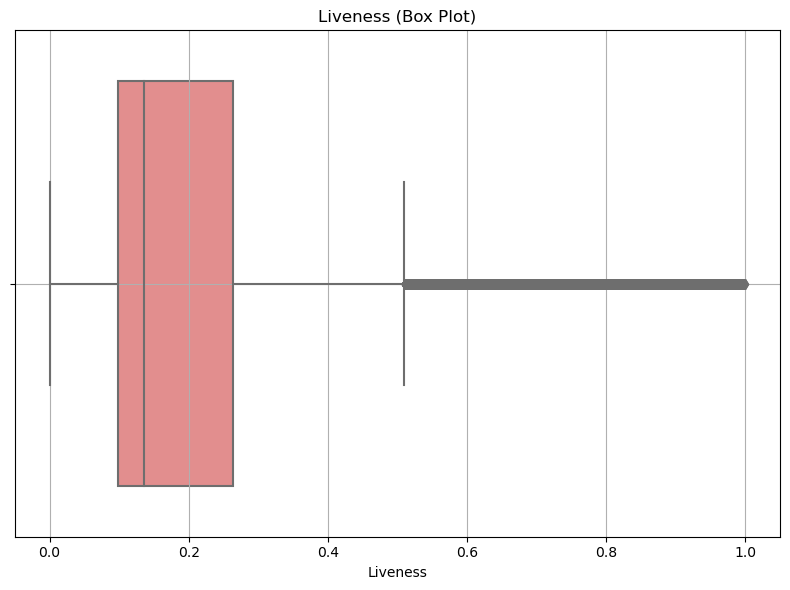

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['liveness'], color='lightcoral')
    
plt.title('Liveness (Box Plot)')
plt.xlabel('Liveness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
data_copy['liveness'].hist(bins=50)

<Axes: >

Loudness

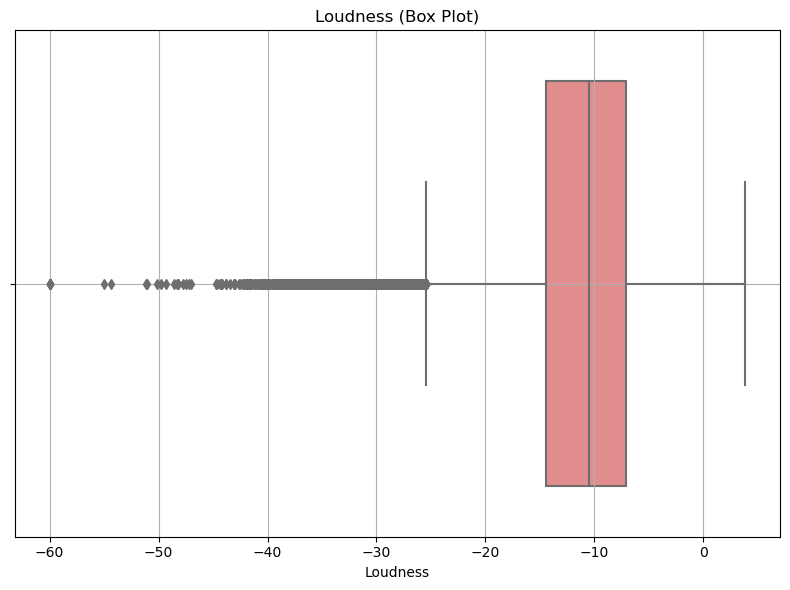

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['loudness'], color='lightcoral')
    
plt.title('Loudness (Box Plot)')
plt.xlabel('Loudness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

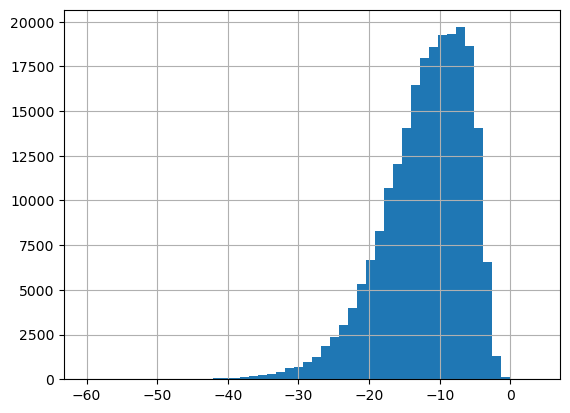

In [68]:
data_copy['loudness'].hist(bins=50)

Popularity

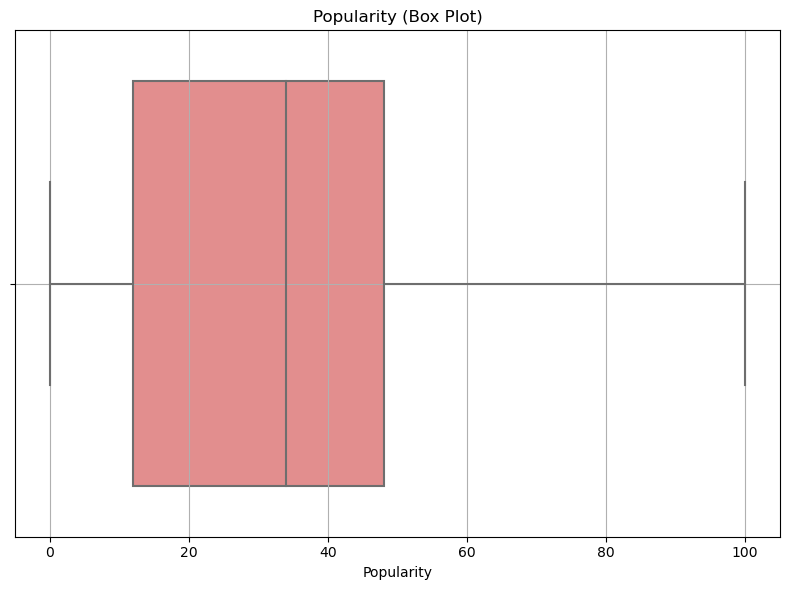

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['popularity'], color='lightcoral')
    
plt.title('Popularity (Box Plot)')
plt.xlabel('Popularity')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
data_copy['popularity'].hist(bins=50)

<Axes: >

Speechiness

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['speechiness'], color='lightcoral')
    
plt.title('Speechiness (Box Plot)')
plt.xlabel('Speechiness')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

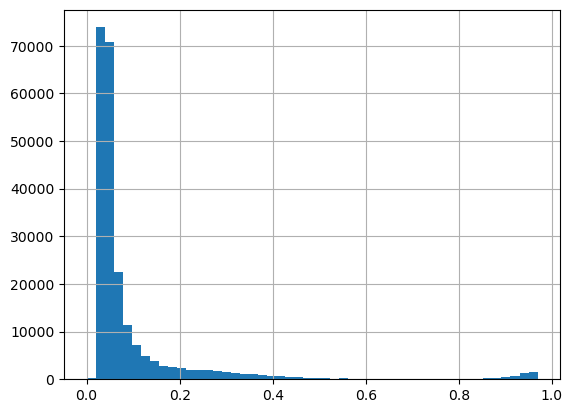

In [72]:
data_copy['speechiness'].hist(bins=50)

Tempo

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['tempo'], color='lightcoral')
    
plt.title('Tempo (Box Plot)')
plt.xlabel('Tempo')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

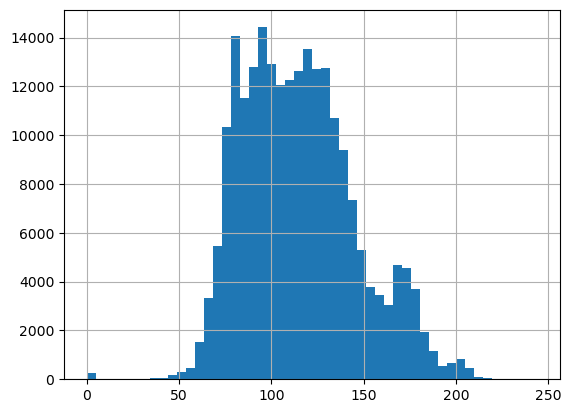

In [74]:
data_copy['tempo'].hist(bins=50)

Que músicas não tem ritmo?

In [75]:
data_copy[data_copy['tempo'] == 0]

acousticness         artists  danceability  duration_ms    energy  \
1269        0.976000  Richard Wagner           0.0       212667  0.085400   
1269        0.976000       Keilberth           0.0       212667  0.085400   
1269        0.976000          Varnay           0.0       212667  0.085400   
1269        0.976000          Lorenz           0.0       212667  0.085400   
1269        0.976000            Uhde           0.0       212667  0.085400   
...              ...             ...           ...          ...       ...   
161927      0.000061    Apocolothoth           0.0       144000  0.000020   
164201      0.862000      Bill Cosby           0.0       215280  0.770000   
169522      0.913000        Granular           0.0       205161  0.000164   
169743      0.000013   Naturaleza FX           0.0       150879  0.000020   
169770      0.957000        Granular           0.0       146061  0.148000   

        explicit  instrumentalness  key  liveness  loudness  ...  \
1269           0          0.000105    7     0.343   -21.505  ...   
1269           0          0.000105    7     0.343   -21.505  ...   
1269           0          0.000105    7     0.343   -21.505  ...   
1269           0          0.000105    7     0.343   -21.505  ...   
1269           0          0.000105    7     0.343   -21.505  ...   
...          ...               ...  ...       ...       ...  ...   
161927         0          0.949000    1     0.900     2.799  ...   
164201         0          0.000002    9     0.694   -15.316  ...   
169522         0          0.910000   10     0.155   -31.221  ...   
169743         0          0.208000    1     0.311   -16.873  ...   
169770         0          0.168000    5     0.112   -22.012  ...   

                                                     name popularity  \
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
...                                                   ...        ...   
161927                                              Idiot          0   
164201                                       Noah: Right!         16   
169522                               White Noise - 700 hz         64   
169743                                 Colors of the Rain         68   
169770                                Brown Noise 750 LPF         69   

        speechiness  tempo  valence  year  duration_minutes  \
1269            0.0    0.0      0.0  1952           3.54445   
1269            0.0    0.0      0.0  1952           3.54445   
1269            0.0    0.0      0.0  1952           3.54445   
1269            0.0    0.0      0.0  1952           3.54445   
1269            0.0    0.0      0.0  1952           3.54445   
...             ...    ...      ...   ...               ...   
161927          0.0    0.0      0.0  1936           2.40000   
164201          0.0    0.0      0.0  1963           3.58800   
169522          0.0    0.0      0.0  2017           3.41935   
169743          0.0    0.0      0.0  2019           2.51465   
169770          0.0    0.0      0.0  2019           2.43435   

        release_date_year  release_date_month  release_date_day  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
...                   ...                 ...               ...  
161927             1936.0                 5.0              27.0  
164201                NaN                 NaN               NaN  
169522             2017.0                10.0     

Valence

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['valence'], color='lightcoral')
    
plt.title('Valence (Box Plot)')
plt.xlabel('Valence')
    
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

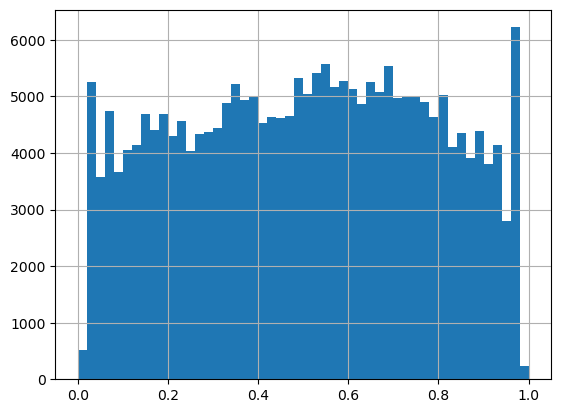

In [77]:
data_copy['valence'].hist(bins=50)

Que músicas não tem valência?

In [78]:
data_copy[data_copy['valence'] == 0]

acousticness                      artists  danceability  duration_ms  \
943         0.940000              Igor Stravinsky         0.182        25200   
943         0.940000  Columbia Symphony Orchestra         0.182        25200   
1269        0.976000               Richard Wagner         0.000       212667   
1269        0.976000                    Keilberth         0.000       212667   
1269        0.976000                       Varnay         0.000       212667   
...              ...                          ...           ...          ...   
164201      0.862000                   Bill Cosby         0.000       215280   
166088      0.293000                   Bad Brains         0.420        45000   
169522      0.913000                     Granular         0.000       205161   
169743      0.000013                Naturaleza FX         0.000       150879   
169770      0.957000                     Granular         0.000       146061   

          energy  explicit  instrumentalness  key  liveness  loudness  ...  \
943     0.000884         0          0.993000   10     0.082   -48.278  ...   
943     0.000884         0          0.993000   10     0.082   -48.278  ...   
1269    0.085400         0          0.000105    7     0.343   -21.505  ...   
1269    0.085400         0          0.000105    7     0.343   -21.505  ...   
1269    0.085400         0          0.000105    7     0.343   -21.505  ...   
...          ...       ...               ...  ...       ...       ...  ...   
164201  0.770000         0          0.000002    9     0.694   -15.316  ...   
166088  0.000281         0          0.442000    1     0.749   -15.637  ...   
169522  0.000164         0          0.910000   10     0.155   -31.221  ...   
169743  0.000020         0          0.208000    1     0.311   -16.873  ...   
169770  0.148000         0          0.168000    5     0.112   -22.012  ...   

                                                     name popularity  \
943     Le sacre du printemps: Part 1 "Adoration of th...          0   
943     Le sacre du printemps: Part 1 "Adoration of th...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
1269    Götterdämmerung : Act 1 : Willkommen, Gast, In...          0   
...                                                   ...        ...   
164201                                       Noah: Right!         16   
166088                                              Intro         30   
169522                               White Noise - 700 hz         64   
169743                                 Colors of the Rain         68   
169770                                Brown Noise 750 LPF         69   

        speechiness    tempo  valence  year  duration_minutes  \
943          0.0604  118.462      0.0  1948           0.42000   
943          0.0604  118.462      0.0  1948           0.42000   
1269         0.0000    0.000      0.0  1952           3.54445   
1269         0.0000    0.000      0.0  1952           3.54445   
1269         0.0000    0.000      0.0  1952           3.54445   
...             ...      ...      ...   ...               ...   
164201       0.0000    0.000      0.0  1963           3.58800   
166088       0.3980   79.383      0.0  1982           0.75000   
169522       0.0000    0.000      0.0  2017           3.41935   
169743       0.0000    0.000      0.0  2019           2.51465   
169770       0.0000    0.000      0.0  2019           2.43435   

        release_date_year  release_date_month  release_date_day  
943                   NaN                 NaN               NaN  
943                   NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
1269                  NaN                 NaN               NaN  
...                   ...                 ...               ...  
16

### Aplicando binning

Binning em diversas features para visualizar as correlações com a popularidade 

Energy

In [79]:
data_binned = data_copy.copy()
estimator = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_binned['energy_binned'] = estimator.fit_transform(data_copy[['energy']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225449 entries, 0 to 169908
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   acousticness        225449 non-null  float64
 1   artists             225449 non-null  object 
 2   danceability        225449 non-null  float64
 3   duration_ms         225449 non-null  int64  
 4   energy              225449 non-null  float64
 5   explicit            225449 non-null  int64  
 6   instrumentalness    225449 non-null  float64
 7   key                 225449 non-null  int64  
 8   liveness            225449 non-null  float64
 9   loudness            225449 non-null  float64
 10  mode                225449 non-null  int64  
 11  name                225449 non-null  object 
 12  popularity          225449 non-null  int64  
 13  speechiness         225449 non-null  float64
 14  tempo               225449 non-null  float64
 15  valence             225449 non-null  fl

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


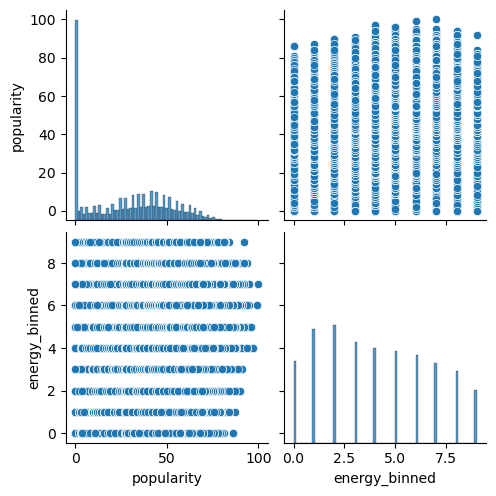

In [80]:
sns.pairplot(data_binned, vars=['popularity', 'energy_binned'])

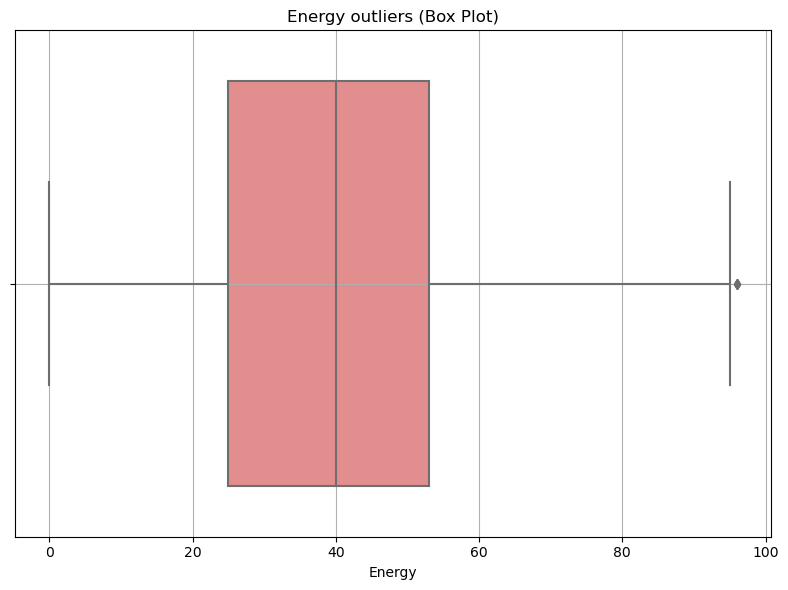

In [81]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_copy[(data_copy['energy'] < 0.6) & (data_copy['energy'] > 0.5)]['popularity'], color='lightcoral')
    
plt.title('Energy outliers (Box Plot)')
plt.xlabel('Energy')
    
plt.grid(True)
plt.tight_layout()
plt.show()

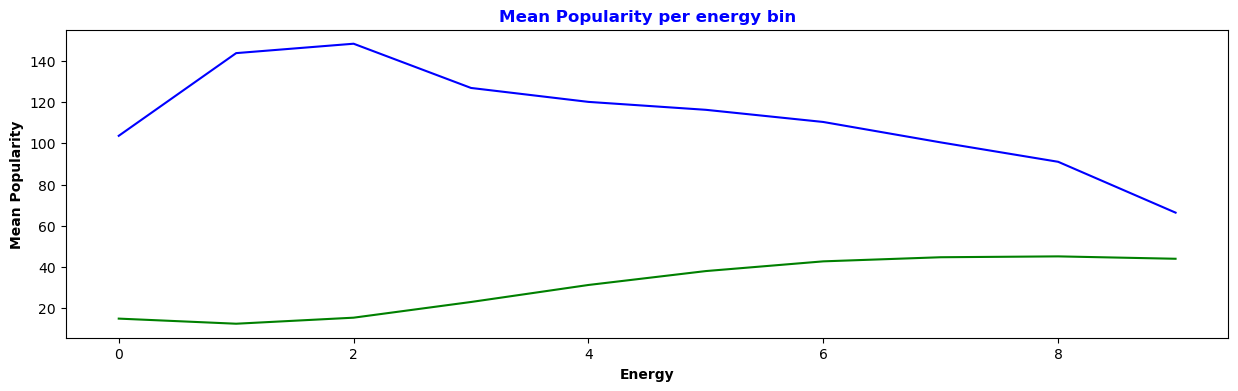

In [82]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('energy_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('energy_binned')['popularity'].count()/200).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per energy bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Energy', weight='bold')
plt.show()

Acousticness

In [83]:
data_binned['acousticness_binned'] = estimator.fit_transform(data_binned[['acousticness']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225449 entries, 0 to 169908
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   acousticness         225449 non-null  float64
 1   artists              225449 non-null  object 
 2   danceability         225449 non-null  float64
 3   duration_ms          225449 non-null  int64  
 4   energy               225449 non-null  float64
 5   explicit             225449 non-null  int64  
 6   instrumentalness     225449 non-null  float64
 7   key                  225449 non-null  int64  
 8   liveness             225449 non-null  float64
 9   loudness             225449 non-null  float64
 10  mode                 225449 non-null  int64  
 11  name                 225449 non-null  object 
 12  popularity           225449 non-null  int64  
 13  speechiness          225449 non-null  float64
 14  tempo                225449 non-null  float64
 15  valence              2

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [84]:
sns.pairplot(data_binned, vars=['popularity', 'acousticness_binned'])

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


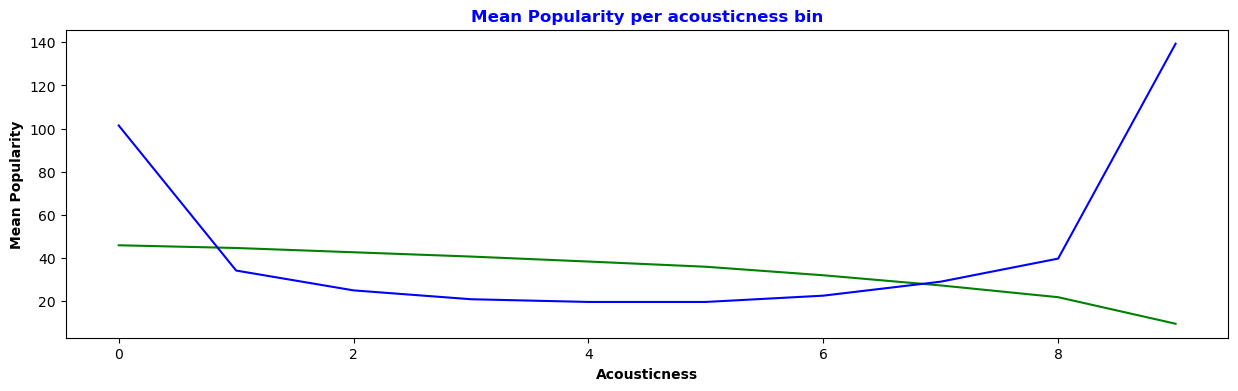

In [85]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('acousticness_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('acousticness_binned')['popularity'].count()/500).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per acousticness bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Acousticness', weight='bold')
plt.show()

Loudness

In [86]:
data_binned['loudness_binned'] = estimator.fit_transform(data_binned[['loudness']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225449 entries, 0 to 169908
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   acousticness         225449 non-null  float64
 1   artists              225449 non-null  object 
 2   danceability         225449 non-null  float64
 3   duration_ms          225449 non-null  int64  
 4   energy               225449 non-null  float64
 5   explicit             225449 non-null  int64  
 6   instrumentalness     225449 non-null  float64
 7   key                  225449 non-null  int64  
 8   liveness             225449 non-null  float64
 9   loudness             225449 non-null  float64
 10  mode                 225449 non-null  int64  
 11  name                 225449 non-null  object 
 12  popularity           225449 non-null  int64  
 13  speechiness          225449 non-null  float64
 14  tempo                225449 non-null  float64
 15  valence              2

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


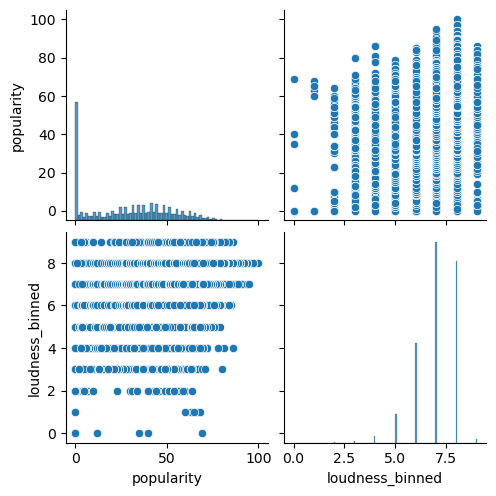

In [87]:
sns.pairplot(data_binned, vars=['popularity', 'loudness_binned'])

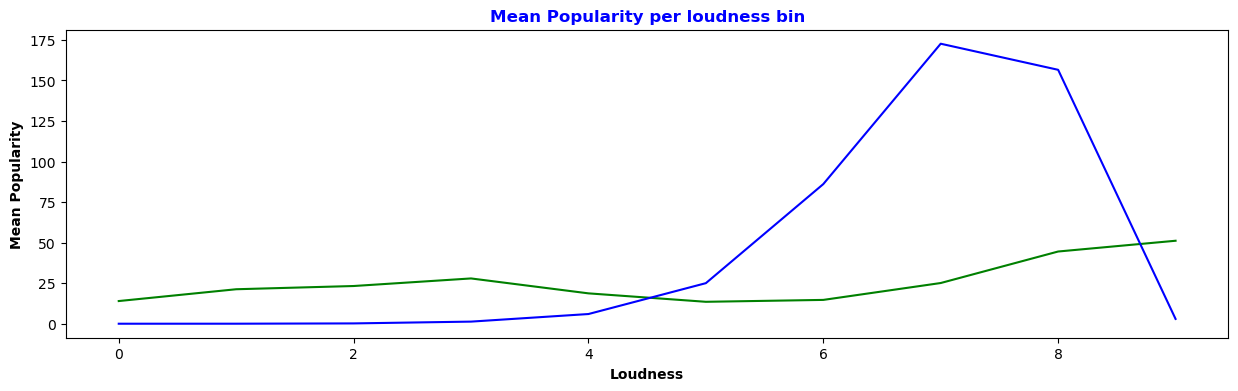

In [88]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('loudness_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('loudness_binned')['popularity'].count()/500).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per loudness bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Loudness', weight='bold')
plt.show()

Instrumentalness

In [89]:
data_binned['instrumentalness_binned'] = estimator.fit_transform(data_binned[['instrumentalness']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225449 entries, 0 to 169908
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   acousticness             225449 non-null  float64
 1   artists                  225449 non-null  object 
 2   danceability             225449 non-null  float64
 3   duration_ms              225449 non-null  int64  
 4   energy                   225449 non-null  float64
 5   explicit                 225449 non-null  int64  
 6   instrumentalness         225449 non-null  float64
 7   key                      225449 non-null  int64  
 8   liveness                 225449 non-null  float64
 9   loudness                 225449 non-null  float64
 10  mode                     225449 non-null  int64  
 11  name                     225449 non-null  object 
 12  popularity               225449 non-null  int64  
 13  speechiness              225449 non-null  float64
 14  tempo    

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


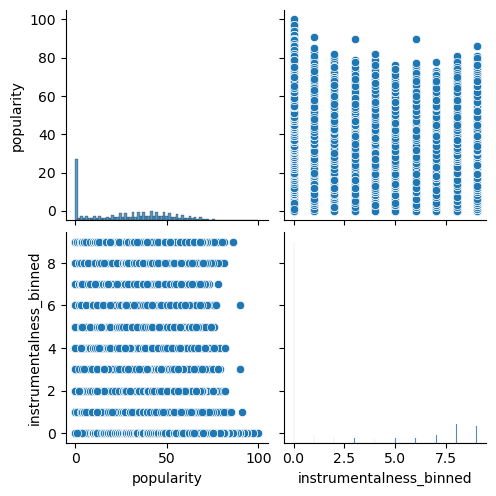

In [90]:
sns.pairplot(data_binned, vars=['popularity', 'instrumentalness_binned'])

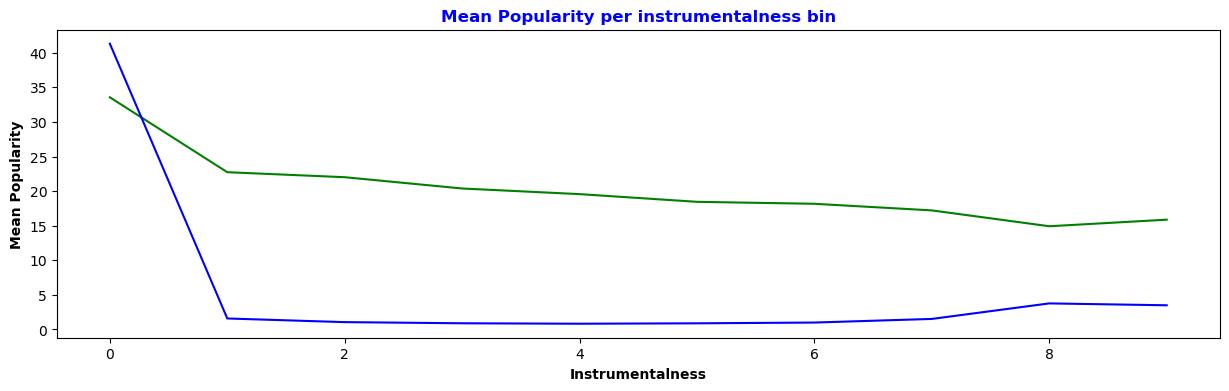

In [91]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('instrumentalness_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('instrumentalness_binned')['popularity'].count()/4000).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per instrumentalness bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Instrumentalness', weight='bold')
plt.show()

Duration Minutes

In [92]:
data_binned['duration_binned'] = estimator.fit_transform(data_binned[['duration_minutes']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225449 entries, 0 to 169908
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   acousticness             225449 non-null  float64
 1   artists                  225449 non-null  object 
 2   danceability             225449 non-null  float64
 3   duration_ms              225449 non-null  int64  
 4   energy                   225449 non-null  float64
 5   explicit                 225449 non-null  int64  
 6   instrumentalness         225449 non-null  float64
 7   key                      225449 non-null  int64  
 8   liveness                 225449 non-null  float64
 9   loudness                 225449 non-null  float64
 10  mode                     225449 non-null  int64  
 11  name                     225449 non-null  object 
 12  popularity               225449 non-null  int64  
 13  speechiness              225449 non-null  float64
 14  tempo    

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [93]:
sns.pairplot(data_binned, vars=['popularity', 'duration_binned'])

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [94]:
fig, ax = plt.subplots(figsize=(15, 4))
data_binned.groupby('duration_binned')['popularity'].mean().plot(color='green', ax=ax)
(data_binned.groupby('duration_binned')['popularity'].count()/4000).plot(color='blue', ax=ax, label='Count')
ax.set_title('Mean Popularity per duration bin', c='blue', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Duration', weight='bold')
plt.show()

In [261]:
data_copy[data_copy['duration_minutes'] > 30].sort_values(by=['popularity'], ascending=False).to_csv('long_songs.csv', index=False)